# unzipping dataset

In [6]:
import zipfile, os
zip_path = 'dataset.zip'
extract_to = '.'
if os.path.exists(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f'Unzipped {zip_path} to {extract_to}')
else:
    print(f'{zip_path} not found!')

Unzipped dataset.zip to .


In [1]:
!pip install -q ultralytics torch torchvision matplotlib opencv-python

In [2]:
import torch
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Checking GPU availability


In [3]:
device = 0 if torch.cuda.is_available() else 'cpu'
print(f"Using device: {'GPU' if device == 0 else 'CPU'}")

Using device: GPU


# Adding Yolo10 Pretrain model

In [4]:
# pre-trained model of YOLO
model = YOLO("yolov10s.pt")
results = model.predict(source="unnamed.jpg", conf=0.25, save=True)


image 1/1 /home/a85d/solr-home/Vision/unnamed.jpg: 640x640 1 person, 1 cat, 6.1ms
Speed: 3.0ms preprocess, 6.1ms inference, 19.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict5


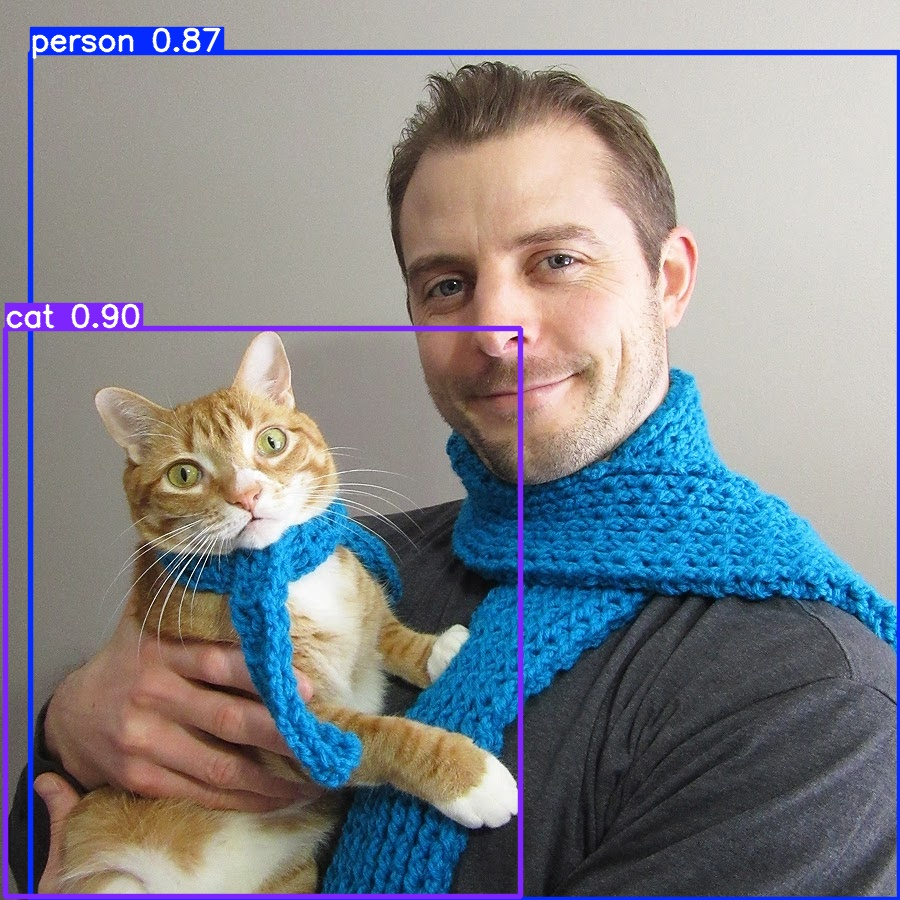

In [ ]:
# Checking model loaded successfully or not
from IPython.display import Image
Image(filename='runs/detect/predict/unnamed.jpg')

# Checking, that does model trained with any classes from our dataset 

In [18]:
results = model.predict(source="dataset/images/test/192.168.2.20_1c_30.jpg", conf=0.25, save=True)


image 1/1 /home/a85d/solr-home/Vision/dataset/images/test/192.168.2.20_1c_30.jpg: 352x640 1 person, 8.8ms
Speed: 18.0ms preprocess, 8.8ms inference, 0.5ms postprocess per image at shape (1, 3, 352, 640)
Results saved to runs/detect/predict


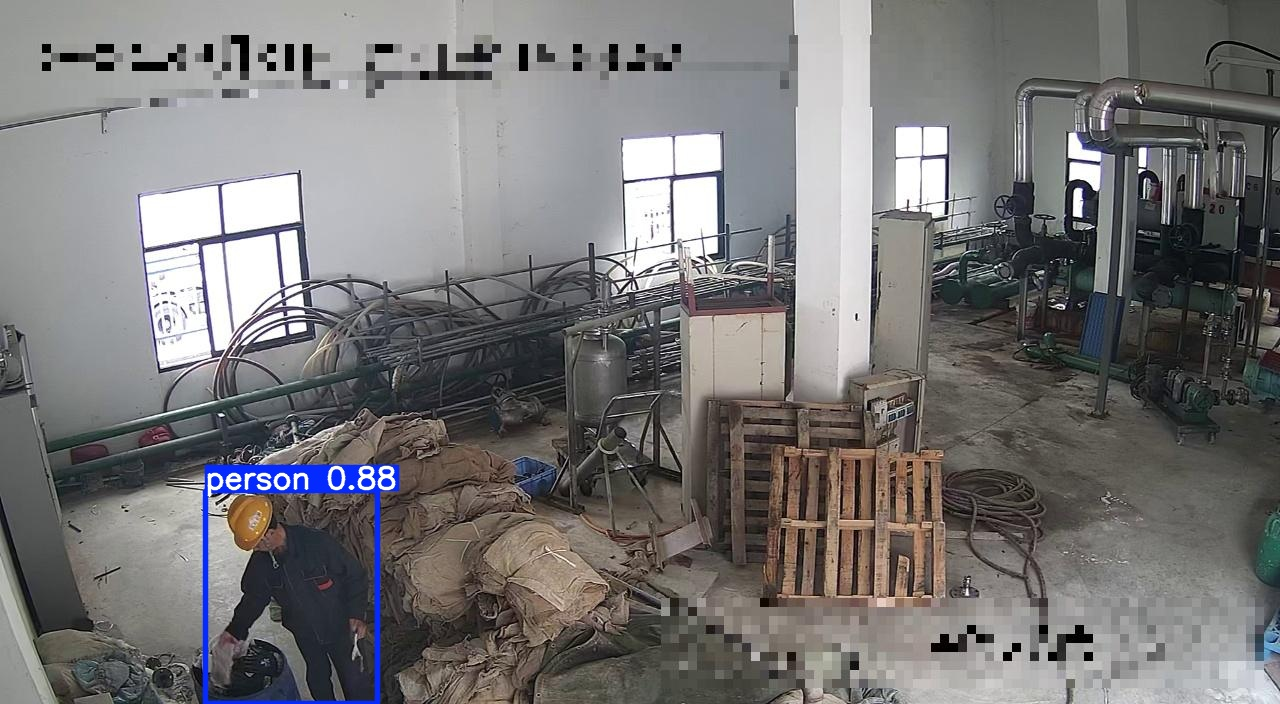

In [ ]:
Image(filename='runs/detect/predict/192.168.2.20_1c_30.jpg')

# checking information of model

In [21]:
print(model.model)

DetectionModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (act): SiLU(inplace=True)
    )
    (2): C2f(
      (cv1): Conv(
        (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(96, 64, kernel_size=(1, 1), stride=(1, 1))
        (act): SiLU(inplace=True)
      )
      (m): ModuleList(
        (0): Bottleneck(
          (cv1): Conv(
            (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (act): SiLU(inplace=True)
          )
        )
      )
    )
    (3): Conv(
      (conv): Conv2d(64

# checking information about freezing layers


In [ ]:
# Training with freeze argument to freeze backbone (0) and neck (1)
results = model.train(
    data='data.yaml',
    epochs=1,          # just 1 epoch for quick test
    imgsz=640,
    batch=16,
    workers=4,
    lr0=0.01,
    device='cuda',
    name='test_freeze',
    freeze=[0, 1]
)

# After training starts, to check layer freezing status
print("\nLayer trainability status AFTER training started:")
for name, param in model.model.named_parameters():
    status = "Trainable" if param.requires_grad else "Frozen"
    print(f"{name}: {status}")

New https://pypi.org/project/ultralytics/8.3.159 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.155 🚀 Python-3.10.12 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 2080 SUPER, 7784MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=[0, 1], half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov10s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=test_freeze2, nbs=64, nms=False, opset=None, optimi

train: Scanning /home/a85d/solr-home/Vision/dataset/labels/train... 8908 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8908/8908 [00:04<00:00, 2136.98it/s]


train: New cache created: /home/a85d/solr-home/Vision/dataset/labels/train.cache
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3206.1±2768.1 MB/s, size: 155.7 KB)


val: Scanning /home/a85d/solr-home/Vision/dataset/labels/val... 2228 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2228/2228 [00:01<00:00, 1840.97it/s]

val: New cache created: /home/a85d/solr-home/Vision/dataset/labels/val.cache


Plotting labels to runs/detect/test_freeze2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 99 weight(decay=0.0), 112 weight(decay=0.0005), 111 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/test_freeze2
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      4.46G      4.477      6.918      3.592         81        640: 100%|██████████| 557/557 [01:43<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:09<00:00,  7.13it/s]


                   all       2228       9273      0.855      0.279      0.305      0.172

1 epochs completed in 0.032 hours.
Optimizer stripped from runs/detect/test_freeze2/weights/last.pt, 16.5MB
Optimizer stripped from runs/detect/test_freeze2/weights/best.pt, 16.5MB

Validating runs/detect/test_freeze2/weights/best.pt...
Ultralytics 8.3.155 🚀 Python-3.10.12 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 2080 SUPER, 7784MiB)
YOLOv10s summary (fused): 106 layers, 7,220,709 parameters, 0 gradients, 21.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:07<00:00,  9.15it/s]


                   all       2228       9273      0.855      0.279      0.305      0.172
                person       2228       3122      0.696      0.819      0.838      0.541
                helmet       1968       2629      0.633      0.597      0.592      0.301
          self_clothes        123        136          1          0     0.0233      0.012
        safety_clothes       2034       2728      0.656      0.534       0.61      0.323
                  head        158        210          1          0     0.0309     0.0146
             blur_head        189        213          1          0     0.0173    0.00526
          blur_clothes        204        235          1          0     0.0219    0.00949
Speed: 0.1ms preprocess, 1.4ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to runs/detect/test_freeze2

Layer trainability status AFTER training started:
model.0.conv.weight: Frozen
model.0.bn.weight: Frozen
model.0.bn.bias: Frozen
model.1.conv.weight: Frozen
model.1

# YOLOv10
- Model training with Weights for unbalanced classes

In [ ]:
results = model.train(
    data='data.yaml',
    epochs=100,
    imgsz=640,
    batch=6,
    workers=4,
    lr0=0.01,
    device='cuda',
    name='First',
    freeze=[0, 1]
)

New https://pypi.org/project/ultralytics/8.3.160 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.155 🚀 Python-3.10.12 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 2080 SUPER, 7784MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=6, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=[0, 1], half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov10s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=First3, nbs=64, nms=False, opset=None, optimize=Fa

train: Scanning /home/a85d/solr-home/Vision/dataset/labels/train.cache... 8908 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8908/8908 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3052.6±2647.2 MB/s, size: 155.7 KB)


val: Scanning /home/a85d/solr-home/Vision/dataset/labels/val.cache... 2228 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2228/2228 [00:00<?, ?it/s]


Plotting labels to runs/detect/First3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 99 weight(decay=0.0), 112 weight(decay=0.000515625), 111 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/First3
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      1.82G      4.414      6.918      3.501         18        640: 100%|██████████| 1485/1485 [06:46<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:51<00:00,  3.61it/s]


                   all       2228       9273      0.854       0.26      0.288      0.165

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100       1.9G      3.179      3.136      2.414         37        640: 100%|██████████| 1485/1485 [07:19<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [01:00<00:00,  3.09it/s]

                   all       2228       9273      0.747      0.307      0.346      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      1.92G      3.016      2.382      2.296         24        640: 100%|██████████| 1485/1485 [07:38<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [01:03<00:00,  2.92it/s]

                   all       2228       9273      0.395      0.416      0.406      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      1.92G      2.903       2.02      2.236         33        640: 100%|██████████| 1485/1485 [07:09<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:41<00:00,  4.51it/s]

                   all       2228       9273      0.529      0.468      0.482       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      1.93G      2.805      1.798      2.198         23        640: 100%|██████████| 1485/1485 [06:17<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:54<00:00,  3.42it/s]

                   all       2228       9273      0.528      0.527      0.535      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      1.93G      2.741      1.656      2.161         24        640: 100%|██████████| 1485/1485 [06:34<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:53<00:00,  3.51it/s]

                   all       2228       9273      0.581      0.542      0.567      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      1.93G       2.71      1.608      2.148         18        640: 100%|██████████| 1485/1485 [06:56<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [01:00<00:00,  3.06it/s]

                   all       2228       9273      0.744      0.536       0.59      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.93G      2.663      1.551      2.136         24        640: 100%|██████████| 1485/1485 [07:50<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:37<00:00,  5.00it/s]

                   all       2228       9273      0.641      0.611      0.616      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      1.93G       2.62      1.493      2.123         31        640: 100%|██████████| 1485/1485 [08:05<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:58<00:00,  3.18it/s]

                   all       2228       9273      0.654      0.636       0.64      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      1.93G      2.574      1.431      2.106         10        640: 100%|██████████| 1485/1485 [07:30<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [01:10<00:00,  2.64it/s]

                   all       2228       9273      0.724      0.624      0.658      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      1.93G      2.559      1.419      2.102         41        640: 100%|██████████| 1485/1485 [07:28<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:58<00:00,  3.20it/s]

                   all       2228       9273      0.677      0.647      0.659       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      1.93G      2.548      1.405      2.097         32        640: 100%|██████████| 1485/1485 [07:10<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [01:08<00:00,  2.72it/s]

                   all       2228       9273      0.706       0.63      0.668      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      1.93G      2.518      1.365      2.081         26        640: 100%|██████████| 1485/1485 [08:28<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:36<00:00,  5.07it/s]

                   all       2228       9273      0.696       0.65      0.667      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      1.93G      2.493      1.343      2.069         27        640: 100%|██████████| 1485/1485 [07:40<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [01:08<00:00,  2.71it/s]

                   all       2228       9273      0.728      0.648       0.68      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      1.93G      2.492      1.322      2.072         21        640: 100%|██████████| 1485/1485 [07:25<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:59<00:00,  3.12it/s]

                   all       2228       9273      0.727      0.665      0.688      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.93G      2.487      1.311      2.069         24        640: 100%|██████████| 1485/1485 [06:32<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:36<00:00,  5.15it/s]

                   all       2228       9273      0.754      0.633       0.68      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      1.93G      2.465       1.29      2.059         39        640: 100%|██████████| 1485/1485 [06:37<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:53<00:00,  3.46it/s]

                   all       2228       9273      0.703      0.654       0.68      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      1.96G      2.434      1.262      2.047         24        640: 100%|██████████| 1485/1485 [07:09<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:40<00:00,  4.64it/s]

                   all       2228       9273       0.77      0.659       0.71       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      1.96G      2.435      1.271      2.056         20        640: 100%|██████████| 1485/1485 [06:19<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:53<00:00,  3.49it/s]

                   all       2228       9273      0.756      0.658      0.695      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      1.96G      2.426       1.25      2.048         42        640: 100%|██████████| 1485/1485 [06:39<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:52<00:00,  3.57it/s]

                   all       2228       9273      0.734       0.67      0.695      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      1.96G       2.39      1.223      2.045         20        640: 100%|██████████| 1485/1485 [06:33<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:44<00:00,  4.22it/s]

                   all       2228       9273      0.769      0.674      0.708      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      1.96G       2.41      1.225      2.041         41        640: 100%|██████████| 1485/1485 [06:50<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:35<00:00,  5.21it/s]

                   all       2228       9273      0.743       0.68      0.711      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      1.96G      2.382      1.201      2.026         56        640: 100%|██████████| 1485/1485 [07:07<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:35<00:00,  5.27it/s]

                   all       2228       9273      0.786      0.652      0.717      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      1.96G       2.39      1.209       2.03         27        640: 100%|██████████| 1485/1485 [06:38<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:53<00:00,  3.50it/s]

                   all       2228       9273      0.735      0.652        0.7      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      1.96G      2.355      1.185      2.021         32        640: 100%|██████████| 1485/1485 [06:29<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:52<00:00,  3.55it/s]

                   all       2228       9273      0.751      0.677      0.712      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      1.96G      2.375      1.185       2.03         26        640: 100%|██████████| 1485/1485 [06:19<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:54<00:00,  3.43it/s]

                   all       2228       9273      0.778      0.652      0.709      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      1.96G       2.34      1.176      2.021         34        640: 100%|██████████| 1485/1485 [07:07<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:24<00:00,  7.49it/s]

                   all       2228       9273      0.746      0.678      0.713      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      1.96G       2.34      1.168      2.022         38        640: 100%|██████████| 1485/1485 [06:49<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:46<00:00,  4.02it/s]

                   all       2228       9273      0.771      0.654      0.716      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      1.96G      2.334      1.161      2.013         21        640: 100%|██████████| 1485/1485 [06:38<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:53<00:00,  3.49it/s]

                   all       2228       9273      0.743      0.686       0.72      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      1.96G      2.326      1.155      2.008         81        640: 100%|██████████| 1485/1485 [06:38<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:41<00:00,  4.47it/s]

                   all       2228       9273      0.767      0.678      0.717      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      1.96G      2.308       1.15      2.004         37        640: 100%|██████████| 1485/1485 [06:33<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:53<00:00,  3.48it/s]

                   all       2228       9273      0.808      0.666      0.726       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      1.96G      2.301      1.145      2.001         39        640: 100%|██████████| 1485/1485 [07:09<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:38<00:00,  4.82it/s]

                   all       2228       9273      0.785      0.667      0.725      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      1.96G      2.308      1.138      2.006         12        640: 100%|██████████| 1485/1485 [06:22<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:52<00:00,  3.55it/s]

                   all       2228       9273      0.765      0.692      0.722       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      1.96G      2.283      1.122          2         29        640: 100%|██████████| 1485/1485 [06:39<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:52<00:00,  3.57it/s]

                   all       2228       9273      0.805      0.658      0.724      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      1.96G      2.289      1.118      1.994         32        640: 100%|██████████| 1485/1485 [06:35<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:41<00:00,  4.52it/s]

                   all       2228       9273      0.778      0.675      0.722      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      1.96G      2.282      1.127      1.989         35        640: 100%|██████████| 1485/1485 [06:46<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:41<00:00,  4.47it/s]

                   all       2228       9273      0.768      0.669      0.721      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      1.96G      2.283       1.12      1.989         57        640: 100%|██████████| 1485/1485 [07:07<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:37<00:00,  4.99it/s]

                   all       2228       9273      0.759      0.687      0.726      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      1.96G      2.272      1.114      1.985         15        640: 100%|██████████| 1485/1485 [06:36<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:52<00:00,  3.52it/s]

                   all       2228       9273      0.772       0.68      0.726      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      1.96G      2.247      1.079      1.981         19        640: 100%|██████████| 1485/1485 [06:18<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:51<00:00,  3.58it/s]

                   all       2228       9273       0.77      0.688      0.725      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      1.96G      2.256      1.092       1.98         29        640: 100%|██████████| 1485/1485 [06:30<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:52<00:00,  3.53it/s]

                   all       2228       9273      0.782      0.672       0.73      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      1.96G      2.244      1.086      1.984         39        640: 100%|██████████| 1485/1485 [07:05<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:21<00:00,  8.47it/s]

                   all       2228       9273      0.799      0.675      0.733      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      1.96G      2.236      1.084      1.973         27        640: 100%|██████████| 1485/1485 [06:56<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:41<00:00,  4.48it/s]

                   all       2228       9273      0.798      0.661      0.726      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      1.96G      2.218      1.061      1.973         30        640: 100%|██████████| 1485/1485 [06:39<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:54<00:00,  3.41it/s]

                   all       2228       9273      0.804       0.67      0.736      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      1.96G      2.229      1.072      1.971         33        640: 100%|██████████| 1485/1485 [06:38<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:44<00:00,  4.20it/s]

                   all       2228       9273      0.818      0.674      0.739      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      1.96G      2.202      1.052      1.963         20        640: 100%|██████████| 1485/1485 [06:23<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:52<00:00,  3.53it/s]

                   all       2228       9273      0.792      0.668      0.731      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      1.96G      2.211      1.056      1.974         29        640: 100%|██████████| 1485/1485 [07:07<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:39<00:00,  4.70it/s]

                   all       2228       9273      0.835      0.659      0.738      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      1.96G      2.217      1.063      1.967         45        640: 100%|██████████| 1485/1485 [06:34<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:52<00:00,  3.54it/s]

                   all       2228       9273      0.769        0.7      0.737      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      1.96G      2.208       1.05      1.966         30        640: 100%|██████████| 1485/1485 [06:40<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:52<00:00,  3.51it/s]

                   all       2228       9273      0.744      0.696      0.731      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      1.96G      2.195      1.052      1.962         20        640: 100%|██████████| 1485/1485 [06:26<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:32<00:00,  5.72it/s]

                   all       2228       9273      0.767      0.698      0.739      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      1.96G      2.192      1.039      1.959         22        640: 100%|██████████| 1485/1485 [06:09<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:45<00:00,  4.12it/s]

                   all       2228       9273      0.787      0.689      0.742      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      1.96G      2.182      1.036      1.953         32        640: 100%|██████████| 1485/1485 [06:35<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:46<00:00,  3.96it/s]

                   all       2228       9273      0.795      0.676      0.734      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      1.96G      2.156      1.018      1.948         48        640: 100%|██████████| 1485/1485 [06:08<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:34<00:00,  5.41it/s]


                   all       2228       9273      0.792      0.697      0.742      0.489

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      1.96G      2.159      1.014      1.948         21        640: 100%|██████████| 1485/1485 [06:06<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:46<00:00,  3.99it/s]

                   all       2228       9273       0.79      0.698      0.749      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      1.96G       2.17      1.026      1.951         26        640: 100%|██████████| 1485/1485 [06:08<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:46<00:00,  4.03it/s]

                   all       2228       9273      0.751      0.703       0.74      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      1.96G      2.147      1.004      1.942         16        640: 100%|██████████| 1485/1485 [06:17<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:32<00:00,  5.73it/s]

                   all       2228       9273      0.758      0.706      0.743      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      1.96G      2.154      1.022      1.952         19        640: 100%|██████████| 1485/1485 [06:26<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:46<00:00,  4.00it/s]

                   all       2228       9273      0.748       0.71      0.742      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      1.96G      2.145     0.9998      1.941         31        640: 100%|██████████| 1485/1485 [06:08<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:46<00:00,  4.00it/s]

                   all       2228       9273      0.775      0.708      0.745      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      1.96G      2.138      1.006      1.941         28        640: 100%|██████████| 1485/1485 [06:04<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:45<00:00,  4.06it/s]

                   all       2228       9273      0.768       0.71      0.746      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      1.96G       2.12     0.9865      1.933         21        640: 100%|██████████| 1485/1485 [06:03<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:36<00:00,  5.06it/s]

                   all       2228       9273      0.779      0.697      0.743      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      1.96G      2.135     0.9912      1.937         31        640: 100%|██████████| 1485/1485 [06:34<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:22<00:00,  8.40it/s]

                   all       2228       9273      0.774       0.71      0.744      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      1.96G      2.131     0.9919      1.936         33        640: 100%|██████████| 1485/1485 [06:27<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:45<00:00,  4.08it/s]

                   all       2228       9273      0.797      0.706      0.751      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      1.96G      2.111     0.9797      1.926         39        640: 100%|██████████| 1485/1485 [06:01<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:34<00:00,  5.44it/s]

                   all       2228       9273      0.805      0.698       0.75      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      1.96G      2.094     0.9677      1.925         16        640: 100%|██████████| 1485/1485 [06:08<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:46<00:00,  4.00it/s]

                   all       2228       9273      0.808      0.692      0.747        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      1.96G       2.09     0.9674      1.926         20        640: 100%|██████████| 1485/1485 [06:09<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:46<00:00,  4.02it/s]

                   all       2228       9273      0.778      0.694      0.745      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      1.96G      2.076     0.9611      1.926         33        640: 100%|██████████| 1485/1485 [06:33<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:34<00:00,  5.35it/s]

                   all       2228       9273      0.765      0.706      0.746      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      1.96G      2.071     0.9636      1.918         24        640: 100%|██████████| 1485/1485 [05:57<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:45<00:00,  4.08it/s]

                   all       2228       9273       0.77      0.704      0.746      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      1.96G      2.065     0.9512       1.92         37        640: 100%|██████████| 1485/1485 [06:10<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:45<00:00,  4.08it/s]

                   all       2228       9273      0.782      0.704      0.747        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      1.96G      2.074     0.9619      1.914         38        640: 100%|██████████| 1485/1485 [06:07<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:46<00:00,  4.03it/s]

                   all       2228       9273      0.776      0.709      0.754      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      1.96G      2.069     0.9499      1.918         29        640: 100%|██████████| 1485/1485 [06:12<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:17<00:00, 10.49it/s]

                   all       2228       9273      0.778      0.706       0.75        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      1.96G      2.058     0.9511      1.911         17        640: 100%|██████████| 1485/1485 [06:31<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:45<00:00,  4.10it/s]

                   all       2228       9273      0.781        0.7      0.752        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      1.96G      2.054     0.9511      1.907         53        640: 100%|██████████| 1485/1485 [06:09<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:46<00:00,  4.00it/s]

                   all       2228       9273      0.771      0.708       0.75      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      1.96G      2.041     0.9396      1.899         17        640: 100%|██████████| 1485/1485 [06:06<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:34<00:00,  5.37it/s]

                   all       2228       9273      0.791      0.697      0.745      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      1.96G      2.034      0.933        1.9         24        640: 100%|██████████| 1485/1485 [05:55<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:47<00:00,  3.96it/s]

                   all       2228       9273      0.801      0.695      0.745      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      1.96G      2.037     0.9344      1.902         21        640: 100%|██████████| 1485/1485 [06:33<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:39<00:00,  4.77it/s]

                   all       2228       9273      0.796      0.701      0.748      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      1.96G      2.016     0.9206      1.899         36        640: 100%|██████████| 1485/1485 [06:13<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:40<00:00,  4.58it/s]

                   all       2228       9273      0.803      0.698      0.749        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      1.96G      2.016     0.9204       1.89         42        640: 100%|██████████| 1485/1485 [06:03<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:45<00:00,  4.05it/s]

                   all       2228       9273        0.8      0.697       0.75        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      1.96G      2.011     0.9169      1.889         36        640: 100%|██████████| 1485/1485 [05:54<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:46<00:00,  3.98it/s]

                   all       2228       9273      0.796      0.703       0.75      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      1.96G      2.003     0.9208      1.886         30        640: 100%|██████████| 1485/1485 [06:20<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:30<00:00,  6.06it/s]

                   all       2228       9273      0.774       0.71       0.75      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      1.96G      1.997     0.9087      1.894         36        640: 100%|██████████| 1485/1485 [06:28<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:40<00:00,  4.62it/s]

                   all       2228       9273      0.784      0.707       0.75      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      1.96G      1.981     0.9079      1.887         20        640: 100%|██████████| 1485/1485 [06:10<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:46<00:00,  3.97it/s]

                   all       2228       9273      0.784      0.707      0.752      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      1.96G      1.974     0.9015      1.882         18        640: 100%|██████████| 1485/1485 [05:53<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:46<00:00,  4.01it/s]

                   all       2228       9273      0.809      0.691      0.752      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      1.96G      1.973     0.8985      1.881         23        640: 100%|██████████| 1485/1485 [06:08<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:34<00:00,  5.41it/s]

                   all       2228       9273      0.813      0.691      0.751      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      1.96G      1.973     0.8962      1.877         23        640: 100%|██████████| 1485/1485 [06:30<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:34<00:00,  5.38it/s]

                   all       2228       9273      0.809      0.693      0.751      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      1.96G      1.962     0.8901      1.873         23        640: 100%|██████████| 1485/1485 [06:17<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:46<00:00,  4.04it/s]

                   all       2228       9273      0.805      0.692      0.753      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      1.96G      1.949     0.8826       1.88         33        640: 100%|██████████| 1485/1485 [05:55<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:45<00:00,  4.10it/s]

                   all       2228       9273      0.805      0.691      0.752      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      1.96G      1.958     0.8886       1.87         28        640: 100%|██████████| 1485/1485 [06:00<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:43<00:00,  4.28it/s]

                   all       2228       9273      0.776      0.711      0.752      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      1.96G      1.944     0.8799      1.873         33        640: 100%|██████████| 1485/1485 [06:18<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:35<00:00,  5.31it/s]

                   all       2228       9273      0.783       0.71      0.752      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      1.96G      1.932     0.8719      1.861         33        640: 100%|██████████| 1485/1485 [06:33<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:46<00:00,  4.03it/s]

                   all       2228       9273      0.789      0.708      0.754      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      1.96G      1.927     0.8661      1.862         43        640: 100%|██████████| 1485/1485 [05:50<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:34<00:00,  5.37it/s]

                   all       2228       9273      0.786      0.706      0.752      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      1.96G      1.924     0.8663      1.855         15        640: 100%|██████████| 1485/1485 [06:10<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:46<00:00,  3.97it/s]

                   all       2228       9273       0.79      0.702      0.753      0.501


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      1.96G       1.85     0.7977       1.85         13        640: 100%|██████████| 1485/1485 [06:07<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:46<00:00,  4.00it/s]

                   all       2228       9273      0.799        0.7      0.753      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      1.96G      1.825     0.7827       1.84         21        640: 100%|██████████| 1485/1485 [06:32<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:19<00:00,  9.70it/s]


                   all       2228       9273      0.775      0.716      0.751        0.5

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      1.96G      1.811     0.7745      1.836          9        640: 100%|██████████| 1485/1485 [06:00<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:47<00:00,  3.95it/s]

                   all       2228       9273      0.773      0.714      0.751      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      1.96G      1.804     0.7721      1.831         17        640: 100%|██████████| 1485/1485 [06:10<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:46<00:00,  4.00it/s]

                   all       2228       9273      0.778      0.711      0.751      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      1.96G      1.802     0.7741      1.828         24        640: 100%|██████████| 1485/1485 [06:07<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:46<00:00,  4.01it/s]

                   all       2228       9273      0.769      0.715      0.749      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      1.96G        1.8     0.7708      1.834         20        640: 100%|██████████| 1485/1485 [06:03<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:19<00:00,  9.62it/s]

                   all       2228       9273      0.769      0.714      0.748      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      1.96G      1.786      0.765      1.824          6        640: 100%|██████████| 1485/1485 [06:34<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:46<00:00,  4.04it/s]

                   all       2228       9273      0.775       0.71      0.748      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      1.96G      1.775     0.7556      1.818         15        640: 100%|██████████| 1485/1485 [06:09<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:45<00:00,  4.05it/s]

                   all       2228       9273      0.771      0.714      0.748      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      1.96G      1.779     0.7604      1.823         18        640: 100%|██████████| 1485/1485 [06:05<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:32<00:00,  5.65it/s]

                   all       2228       9273      0.771      0.714      0.748      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      1.96G      1.772     0.7555      1.816         24        640: 100%|██████████| 1485/1485 [05:53<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:46<00:00,  4.01it/s]

                   all       2228       9273      0.782       0.71      0.749      0.498



100 epochs completed in 12.161 hours.
Optimizer stripped from runs/detect/First3/weights/last.pt, 16.5MB
Optimizer stripped from runs/detect/First3/weights/best.pt, 16.5MB

Validating runs/detect/First3/weights/best.pt...
Ultralytics 8.3.155 🚀 Python-3.10.12 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 2080 SUPER, 7784MiB)
YOLOv10s summary (fused): 106 layers, 7,220,709 parameters, 0 gradients, 21.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:36<00:00,  5.13it/s]


                   all       2228       9273       0.81      0.691      0.752      0.502
                person       2228       3122      0.929      0.944      0.968      0.731
                helmet       1968       2629      0.901      0.845      0.916      0.638
          self_clothes        123        136      0.788       0.79      0.834      0.563
        safety_clothes       2034       2728      0.883      0.934      0.954      0.665
                  head        158        210      0.863      0.687      0.779      0.453
             blur_head        189        213      0.696      0.296      0.355      0.192
          blur_clothes        204        235      0.613       0.34      0.456      0.271
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/First3


- Testing model with test data

In [5]:
model_path = "runs/detect/First3/weights/best.pt"
data_yaml = "data.yaml"

# Load the model
model = YOLO(model_path)

# Run evaluation on test set
metrics = model.val(
    data=data_yaml,
    split="test",          # Uses test set (not train or val)
    save=True,             # Saves visual output
    save_conf=True,        # Saves confidences
    save_txt=True,         # Saves predicted labels in YOLO format
    save_json=True,        # Saves COCO-style results.json
    save_crop=True,        # Saves detected object crops
    plots=True             # Saves all metric curves
)

# Print key evaluation metrics
print("Evaluation Metrics")
print(f"mAP@0.5: {metrics.box.map50:.4f}")
print(f"mAP@0.5:0.95: {metrics.box.map:.4f}")


Ultralytics 8.3.155 🚀 Python-3.10.12 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 2080 SUPER, 7784MiB)
YOLOv10s summary (fused): 106 layers, 7,220,709 parameters, 0 gradients, 21.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 125.1±35.5 MB/s, size: 152.6 KB)


val: Scanning /home/a85d/solr-home/Vision/dataset/labels/test.cache... 1236 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1236/1236 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [00:12<00:00,  6.01it/s]


                   all       1236       5081      0.785      0.728      0.766      0.519
                person       1234       1716      0.911      0.953      0.971      0.731
                helmet       1079       1436       0.88        0.9      0.931      0.648
          self_clothes         76         80      0.753      0.838      0.835       0.61
        safety_clothes       1096       1474      0.851      0.948      0.959      0.665
                  head         88        123      0.824      0.691      0.765      0.449
             blur_head         96        109       0.56      0.303      0.369      0.197
          blur_clothes        127        143      0.717      0.462      0.529      0.335
Speed: 0.1ms preprocess, 2.8ms inference, 0.0ms loss, 0.1ms postprocess per image
Saving runs/detect/val8/predictions.json...
Results saved to runs/detect/val8
Evaluation Metrics
mAP@0.5: 0.7657
mAP@0.5:0.95: 0.5193


- Training model without any class weights

In [ ]:
results = model.train(
    data='data.yaml',
    epochs=100,
    imgsz=640,
    batch=16,
    workers=4,
    lr0=0.01,
    device='cuda',
    name='First',
    freeze=[0, 1]
)

New https://pypi.org/project/ultralytics/8.3.159 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.155 🚀 Python-3.10.12 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 2080 SUPER, 7784MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=[0, 1], half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov10s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=First, nbs=64, nms=False, opset=None, optimize=F

train: Scanning /home/a85d/solr-home/Vision/dataset/labels/train.cache... 8908 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8908/8908 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2854.5±2540.9 MB/s, size: 155.7 KB)


val: Scanning /home/a85d/solr-home/Vision/dataset/labels/val.cache... 2228 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2228/2228 [00:00<?, ?it/s]


Plotting labels to runs/detect/First/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 99 weight(decay=0.0), 112 weight(decay=0.0005), 111 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/First
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.52G      3.025      3.167      2.293         81        640: 100%|██████████| 557/557 [01:43<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.54it/s]

                   all       2228       9273      0.525      0.319      0.343        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      4.37G      3.023      2.686      2.242        120        640: 100%|██████████| 557/557 [01:38<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.56it/s]


                   all       2228       9273      0.648      0.307       0.36      0.216

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      4.46G      2.942      2.277      2.184         77        640: 100%|██████████| 557/557 [01:36<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.54it/s]

                   all       2228       9273      0.432      0.425      0.417       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      4.34G      2.862      1.968      2.139         94        640: 100%|██████████| 557/557 [01:36<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.52it/s]


                   all       2228       9273      0.578       0.48      0.493      0.298

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.43G      2.758      1.751      2.104         62        640: 100%|██████████| 557/557 [01:36<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.53it/s]

                   all       2228       9273      0.566      0.545      0.558      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      4.37G      2.692      1.619      2.068         99        640: 100%|██████████| 557/557 [01:36<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.53it/s]

                   all       2228       9273      0.662       0.57      0.596      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      4.41G      2.652      1.547      2.041         66        640: 100%|██████████| 557/557 [01:36<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.53it/s]

                   all       2228       9273      0.639      0.609      0.623      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      4.42G      2.603      1.489      2.023         87        640: 100%|██████████| 557/557 [01:36<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.52it/s]

                   all       2228       9273      0.672      0.598      0.624      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      4.38G      2.574      1.444      2.015        110        640: 100%|██████████| 557/557 [01:36<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.51it/s]

                   all       2228       9273      0.718      0.617      0.658      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      4.45G      2.542      1.413      1.999         53        640: 100%|██████████| 557/557 [01:36<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.51it/s]

                   all       2228       9273      0.713       0.63      0.659      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      4.36G      2.509      1.362       1.99        113        640: 100%|██████████| 557/557 [01:36<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.49it/s]

                   all       2228       9273      0.695      0.632      0.667      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      4.42G      2.489      1.342      1.979        117        640: 100%|██████████| 557/557 [01:36<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.53it/s]

                   all       2228       9273      0.732      0.628      0.669      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      4.41G      2.485      1.333      1.981         58        640: 100%|██████████| 557/557 [01:37<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.51it/s]

                   all       2228       9273      0.724      0.642       0.68      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      4.39G      2.464      1.295      1.965        111        640: 100%|██████████| 557/557 [01:37<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.51it/s]

                   all       2228       9273      0.757      0.651      0.696      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      4.36G      2.437      1.276       1.96         70        640: 100%|██████████| 557/557 [01:37<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.48it/s]

                   all       2228       9273      0.757      0.648      0.698      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      4.42G      2.427      1.262      1.957         70        640: 100%|██████████| 557/557 [01:36<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.45it/s]


                   all       2228       9273       0.77      0.629      0.692      0.438

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      4.41G      2.416      1.255      1.951        138        640: 100%|██████████| 557/557 [01:37<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.50it/s]

                   all       2228       9273      0.759      0.646       0.69      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100       4.4G      2.404      1.231      1.952         75        640: 100%|██████████| 557/557 [01:37<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.50it/s]

                   all       2228       9273       0.76      0.651      0.702      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      4.38G      2.375      1.211      1.944         94        640: 100%|██████████| 557/557 [01:37<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.48it/s]

                   all       2228       9273      0.769      0.662      0.706      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      4.41G      2.358      1.199      1.936         85        640: 100%|██████████| 557/557 [01:36<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.51it/s]

                   all       2228       9273      0.732      0.675      0.707      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      4.34G      2.367      1.199      1.943         98        640: 100%|██████████| 557/557 [01:37<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.50it/s]

                   all       2228       9273      0.781      0.666      0.716      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      4.36G      2.358      1.189      1.936         62        640: 100%|██████████| 557/557 [01:37<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.50it/s]

                   all       2228       9273      0.773      0.655      0.715       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      4.43G      2.334      1.165      1.929        128        640: 100%|██████████| 557/557 [01:36<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.48it/s]

                   all       2228       9273       0.77      0.665      0.718      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      4.42G      2.328      1.179      1.924         96        640: 100%|██████████| 557/557 [01:36<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.52it/s]

                   all       2228       9273      0.748      0.676      0.716       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      4.44G      2.319      1.146      1.926        161        640: 100%|██████████| 557/557 [01:36<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.50it/s]

                   all       2228       9273      0.727      0.679      0.712      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      4.46G      2.319      1.163      1.921         75        640: 100%|██████████| 557/557 [01:37<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.51it/s]

                   all       2228       9273      0.755      0.677      0.715      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      4.41G      2.305      1.135      1.918        110        640: 100%|██████████| 557/557 [01:37<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.52it/s]

                   all       2228       9273      0.764      0.692       0.73      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      4.43G      2.291      1.124      1.914         81        640: 100%|██████████| 557/557 [01:36<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.51it/s]

                   all       2228       9273      0.776      0.661      0.724      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      4.43G      2.293      1.124      1.908         79        640: 100%|██████████| 557/557 [01:36<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.51it/s]

                   all       2228       9273      0.783      0.689      0.726      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      4.42G       2.27      1.119      1.907        106        640: 100%|██████████| 557/557 [01:36<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.48it/s]

                   all       2228       9273      0.768      0.687      0.728      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      4.43G      2.275       1.12      1.905         77        640: 100%|██████████| 557/557 [01:36<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.51it/s]

                   all       2228       9273      0.769      0.677      0.727      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      4.43G      2.276      1.117      1.906        109        640: 100%|██████████| 557/557 [01:37<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.51it/s]

                   all       2228       9273      0.806      0.659      0.727      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      4.43G      2.248      1.097      1.898         58        640: 100%|██████████| 557/557 [01:36<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.49it/s]

                   all       2228       9273      0.806      0.673      0.733      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      4.42G      2.242      1.087       1.89         85        640: 100%|██████████| 557/557 [01:37<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.51it/s]

                   all       2228       9273      0.783        0.7      0.737      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      4.41G      2.236      1.077      1.896         87        640: 100%|██████████| 557/557 [01:37<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.54it/s]

                   all       2228       9273      0.777      0.695      0.737      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      4.42G      2.215      1.072      1.888        119        640: 100%|██████████| 557/557 [01:37<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.52it/s]


                   all       2228       9273       0.78      0.684      0.728      0.477

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      4.37G      2.223      1.076      1.884        103        640: 100%|██████████| 557/557 [01:37<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.47it/s]

                   all       2228       9273      0.753      0.702      0.736      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      4.41G      2.216      1.067      1.885         78        640: 100%|██████████| 557/557 [01:37<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.51it/s]

                   all       2228       9273      0.787      0.689      0.737      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      4.46G      2.202      1.053      1.885        104        640: 100%|██████████| 557/557 [01:37<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.49it/s]

                   all       2228       9273      0.791       0.69      0.737      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      4.41G       2.19      1.052       1.88         55        640: 100%|██████████| 557/557 [01:37<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.52it/s]

                   all       2228       9273      0.789      0.696      0.739      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      4.42G      2.182      1.038      1.872         69        640: 100%|██████████| 557/557 [01:37<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.53it/s]

                   all       2228       9273       0.79      0.688      0.738      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      4.41G      2.184      1.036      1.876        124        640: 100%|██████████| 557/557 [01:37<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.57it/s]

                   all       2228       9273      0.775      0.698      0.739      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      4.36G      2.171       1.03       1.87         94        640: 100%|██████████| 557/557 [01:36<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.57it/s]

                   all       2228       9273      0.799        0.7      0.746      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      4.36G      2.171      1.032      1.871         97        640: 100%|██████████| 557/557 [01:36<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.52it/s]


                   all       2228       9273      0.791      0.698      0.741      0.489

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      4.37G      2.171      1.027      1.869         74        640: 100%|██████████| 557/557 [01:36<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.53it/s]

                   all       2228       9273      0.777      0.694      0.738      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      4.35G      2.161      1.016      1.869         89        640: 100%|██████████| 557/557 [01:36<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.55it/s]

                   all       2228       9273      0.772      0.689      0.734      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      4.37G      2.147      1.018      1.866        108        640: 100%|██████████| 557/557 [01:36<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.50it/s]

                   all       2228       9273      0.783      0.708      0.743      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      4.51G      2.138      1.001      1.859         69        640: 100%|██████████| 557/557 [01:36<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.50it/s]


                   all       2228       9273      0.779      0.691      0.737      0.488

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      4.43G      2.131     0.9967      1.859         68        640: 100%|██████████| 557/557 [01:36<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.49it/s]

                   all       2228       9273       0.77      0.708      0.738      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      4.43G      2.127          1      1.859         84        640: 100%|██████████| 557/557 [01:36<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.51it/s]

                   all       2228       9273      0.768      0.711       0.74      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      4.43G      2.112     0.9814      1.855        105        640: 100%|██████████| 557/557 [01:36<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.47it/s]

                   all       2228       9273      0.802      0.689      0.742      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      4.36G      2.119     0.9896      1.853         58        640: 100%|██████████| 557/557 [01:36<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.51it/s]

                   all       2228       9273       0.78      0.708      0.746      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      4.37G      2.095     0.9763      1.844         94        640: 100%|██████████| 557/557 [01:37<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.51it/s]

                   all       2228       9273      0.779      0.698      0.743      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100       4.4G      2.115     0.9854      1.853         67        640: 100%|██████████| 557/557 [01:36<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.52it/s]

                   all       2228       9273      0.794      0.694      0.743      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      4.38G      2.108     0.9814      1.849        119        640: 100%|██████████| 557/557 [01:36<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.50it/s]

                   all       2228       9273      0.781      0.701      0.743      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100       4.4G      2.079     0.9641      1.847         87        640: 100%|██████████| 557/557 [01:36<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.52it/s]

                   all       2228       9273      0.789      0.688      0.747      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      4.42G      2.081     0.9611      1.846         85        640: 100%|██████████| 557/557 [01:37<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.51it/s]

                   all       2228       9273      0.792      0.699      0.743      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      4.38G      2.089      0.964      1.844         89        640: 100%|██████████| 557/557 [01:37<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.53it/s]

                   all       2228       9273      0.766      0.708      0.741      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      4.36G      2.078     0.9622       1.84         60        640: 100%|██████████| 557/557 [01:37<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.50it/s]

                   all       2228       9273      0.773      0.704      0.745      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      4.39G      2.067     0.9545      1.835         70        640: 100%|██████████| 557/557 [01:37<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.54it/s]

                   all       2228       9273      0.789      0.707      0.746      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      4.41G      2.067     0.9468      1.836         97        640: 100%|██████████| 557/557 [01:37<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.54it/s]

                   all       2228       9273       0.79      0.709      0.748      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      4.43G      2.053     0.9456       1.83        103        640: 100%|██████████| 557/557 [01:36<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.50it/s]

                   all       2228       9273       0.81      0.704      0.749      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      4.47G      2.036     0.9305      1.835        106        640: 100%|██████████| 557/557 [01:37<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.56it/s]


                   all       2228       9273      0.808      0.704       0.75      0.502

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      4.47G      2.024     0.9214      1.828         65        640: 100%|██████████| 557/557 [01:37<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.55it/s]


                   all       2228       9273      0.802      0.703      0.751      0.502

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      4.49G      2.017     0.9244      1.823         81        640: 100%|██████████| 557/557 [01:36<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.53it/s]

                   all       2228       9273        0.8       0.71      0.753      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      4.42G      2.023     0.9231       1.82         67        640: 100%|██████████| 557/557 [01:36<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.53it/s]

                   all       2228       9273      0.806      0.697      0.752      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      4.38G      2.019     0.9137      1.829        116        640: 100%|██████████| 557/557 [01:36<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.57it/s]

                   all       2228       9273      0.801      0.699      0.753      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      4.39G      2.013     0.9103      1.815        100        640: 100%|██████████| 557/557 [01:37<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.53it/s]

                   all       2228       9273      0.806      0.703      0.754      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      4.38G      1.983     0.8958      1.813         76        640: 100%|██████████| 557/557 [01:37<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.51it/s]


                   all       2228       9273      0.813      0.706      0.756      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      4.43G      1.994     0.9036      1.817         78        640: 100%|██████████| 557/557 [01:37<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.51it/s]

                   all       2228       9273      0.798      0.703      0.755      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      4.37G      1.981     0.9016       1.81         84        640: 100%|██████████| 557/557 [01:36<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.51it/s]

                   all       2228       9273        0.8      0.701      0.754      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      4.38G      1.981     0.9017      1.812         48        640: 100%|██████████| 557/557 [01:37<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.50it/s]

                   all       2228       9273      0.789      0.709      0.756      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      4.41G      1.978     0.8934      1.805         91        640: 100%|██████████| 557/557 [01:37<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.49it/s]

                   all       2228       9273      0.791      0.703       0.75      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100       4.4G      1.967     0.8892      1.805         86        640: 100%|██████████| 557/557 [01:36<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.53it/s]

                   all       2228       9273      0.785      0.705       0.75      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      4.46G      1.949     0.8848      1.804         90        640: 100%|██████████| 557/557 [01:36<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.51it/s]

                   all       2228       9273      0.779      0.712      0.752      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      4.38G      1.944     0.8771      1.798        107        640: 100%|██████████| 557/557 [01:36<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.48it/s]

                   all       2228       9273      0.801      0.705      0.756      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      4.42G      1.939     0.8721        1.8         76        640: 100%|██████████| 557/557 [01:36<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.53it/s]

                   all       2228       9273      0.779      0.723      0.757      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100       4.4G      1.937     0.8715      1.802        100        640: 100%|██████████| 557/557 [01:36<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.53it/s]

                   all       2228       9273      0.791      0.708      0.755      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      4.38G      1.918       0.86      1.791        110        640: 100%|██████████| 557/557 [01:36<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.53it/s]

                   all       2228       9273      0.787      0.713      0.754      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      4.41G      1.913     0.8553      1.795         99        640: 100%|██████████| 557/557 [01:37<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.51it/s]

                   all       2228       9273      0.789      0.715      0.754      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      4.41G      1.915     0.8583      1.791         76        640: 100%|██████████| 557/557 [01:36<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.52it/s]

                   all       2228       9273       0.79       0.71      0.752      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      4.41G      1.907     0.8587      1.787         96        640: 100%|██████████| 557/557 [01:36<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.53it/s]

                   all       2228       9273      0.793      0.709      0.753      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      4.37G      1.896     0.8478      1.786         84        640: 100%|██████████| 557/557 [01:37<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.53it/s]

                   all       2228       9273      0.809      0.693      0.753      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      4.41G      1.881     0.8406      1.781         86        640: 100%|██████████| 557/557 [01:36<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.50it/s]

                   all       2228       9273      0.788      0.712      0.754      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      4.41G      1.889     0.8438      1.786         99        640: 100%|██████████| 557/557 [01:36<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.52it/s]

                   all       2228       9273      0.813        0.7      0.756      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      4.44G      1.876      0.837      1.778         86        640: 100%|██████████| 557/557 [01:36<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.54it/s]

                   all       2228       9273      0.805      0.702      0.753      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      4.43G       1.86     0.8265      1.776         69        640: 100%|██████████| 557/557 [01:36<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.49it/s]

                   all       2228       9273      0.806      0.701      0.753      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      4.38G      1.861     0.8274      1.775         93        640: 100%|██████████| 557/557 [01:36<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.50it/s]

                   all       2228       9273      0.803      0.706      0.752      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100       4.4G       1.85     0.8146      1.771         94        640: 100%|██████████| 557/557 [01:36<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.52it/s]

                   all       2228       9273      0.802      0.704      0.751      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100       4.5G      1.833     0.8101      1.766         57        640: 100%|██████████| 557/557 [01:36<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.51it/s]

                   all       2228       9273      0.816      0.694      0.751      0.502


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.31G      1.773      0.755       1.76         61        640: 100%|██████████| 557/557 [01:36<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.52it/s]

                   all       2228       9273      0.806      0.702      0.752      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      4.36G      1.745     0.7445      1.758         40        640: 100%|██████████| 557/557 [01:35<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.50it/s]

                   all       2228       9273      0.802      0.704      0.754      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      4.35G      1.739     0.7355      1.752         29        640: 100%|██████████| 557/557 [01:35<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.47it/s]

                   all       2228       9273      0.801      0.706      0.755      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      4.31G      1.722     0.7307      1.749         51        640: 100%|██████████| 557/557 [01:35<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.50it/s]

                   all       2228       9273      0.799      0.705      0.754      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      4.36G      1.722     0.7276      1.748         48        640: 100%|██████████| 557/557 [01:35<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.53it/s]

                   all       2228       9273       0.79      0.706      0.754      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      4.31G      1.718     0.7261      1.748         50        640: 100%|██████████| 557/557 [01:35<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.49it/s]

                   all       2228       9273      0.792      0.708      0.754      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      4.32G      1.699     0.7134      1.748         34        640: 100%|██████████| 557/557 [01:37<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.51it/s]

                   all       2228       9273      0.796      0.707      0.754      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      4.31G      1.698     0.7198      1.744         42        640: 100%|██████████| 557/557 [01:35<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.52it/s]

                   all       2228       9273      0.793      0.709      0.755      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      4.37G      1.695     0.7085      1.736         39        640: 100%|██████████| 557/557 [01:35<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.51it/s]

                   all       2228       9273       0.79      0.711      0.755      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      4.35G      1.676     0.7052      1.733         49        640: 100%|██████████| 557/557 [01:35<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.50it/s]

                   all       2228       9273      0.786      0.715      0.755      0.501



100 epochs completed in 2.938 hours.
Optimizer stripped from runs/detect/First/weights/last.pt, 16.5MB
Optimizer stripped from runs/detect/First/weights/best.pt, 16.5MB

Validating runs/detect/First/weights/best.pt...
Ultralytics 8.3.155 🚀 Python-3.10.12 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 2080 SUPER, 7784MiB)
YOLOv10s summary (fused): 106 layers, 7,220,709 parameters, 0 gradients, 21.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:07<00:00,  8.95it/s]


                   all       2228       9273      0.812        0.7      0.756      0.505
                person       2228       3122      0.925      0.939      0.968      0.735
                helmet       1968       2629      0.915      0.845      0.921      0.635
          self_clothes        123        136      0.789       0.77      0.832      0.564
        safety_clothes       2034       2728      0.895      0.942      0.959      0.666
                  head        158        210      0.829       0.69      0.774      0.465
             blur_head        189        213      0.709      0.329      0.375      0.201
          blur_clothes        204        235      0.623      0.387      0.461      0.272
Speed: 0.1ms preprocess, 1.5ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to runs/detect/First


- testing model with unseen data

In [9]:
model_path = "runs/detect/First/weights/best.pt"
data_yaml = "data.yaml"

# Load the model
model = YOLO(model_path)

# Run evaluation on test set
metrics = model.val(
    data=data_yaml,
    split="test",          # Uses test set (not train or val)
    save=True,             # Saves visual output
    save_conf=True,        # Saves confidences
    save_txt=True,         # Saves predicted labels in YOLO format
    save_json=True,        # Saves COCO-style results.json
    save_crop=True,        # Saves detected object crops
    plots=True             # Saves all metric curves
)

# Print key evaluation metrics
print("Evaluation Metrics")
print(f"mAP@0.5: {metrics.box.map50:.4f}")
print(f"mAP@0.5:0.95: {metrics.box.map:.4f}")


Ultralytics 8.3.155 🚀 Python-3.10.12 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 2080 SUPER, 7784MiB)


YOLOv10s summary (fused): 106 layers, 7,220,709 parameters, 0 gradients, 21.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4797.2±577.8 MB/s, size: 198.8 KB)


val: Scanning /home/a85d/solr-home/Vision/dataset/labels/test.cache... 1236 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1236/1236 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [00:17<00:00,  4.58it/s]


                   all       1236       5081      0.764      0.741      0.763      0.514
                person       1234       1716      0.911      0.949       0.97      0.741
                helmet       1079       1436      0.879      0.904      0.935      0.645
          self_clothes         76         80      0.736      0.838      0.832      0.592
        safety_clothes       1096       1474       0.87      0.954      0.959      0.666
                  head         88        123      0.806      0.699      0.774      0.462
             blur_head         96        109      0.565      0.394      0.385      0.199
          blur_clothes        127        143      0.582      0.448      0.487      0.296
Speed: 0.1ms preprocess, 2.7ms inference, 0.0ms loss, 0.1ms postprocess per image
Saving runs/detect/val5/predictions.json...
Results saved to runs/detect/val5
Evaluation Metrics
mAP@0.5: 0.7629
mAP@0.5:0.95: 0.5145


# Yolov11
- training model with Class weights in order to balance class

In [ ]:
# loading pretrained weights from yolo11
model = YOLO("yolo11s.pt")

In [7]:
results = model.train(
    data='data.yaml',
    epochs=100,
    imgsz=640,
    batch=6,
    workers=4,
    device='cuda',
    name='Sec',
    freeze=[0, 1]
)

New https://pypi.org/project/ultralytics/8.3.160 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.155 🚀 Python-3.10.12 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 2080 SUPER, 7784MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=6, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=[0, 1], half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=Sec3, nbs=64, nms=False, opset=None, optimize=False

train: Scanning /home/a85d/solr-home/Vision/dataset/labels/train.cache... 8908 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8908/8908 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2052.9±1654.2 MB/s, size: 155.7 KB)


val: Scanning /home/a85d/solr-home/Vision/dataset/labels/val.cache... 2228 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2228/2228 [00:00<?, ?it/s]


Plotting labels to runs/detect/Sec3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.000515625), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/Sec3
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100       1.5G      1.243      1.119       1.05         18        640: 100%|██████████| 1485/1485 [05:22<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:37<00:00,  4.93it/s]

                   all       2228       9273       0.68      0.541      0.582      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100       1.5G       1.23     0.7883      1.029         37        640: 100%|██████████| 1485/1485 [04:44<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:43<00:00,  4.27it/s]

                   all       2228       9273      0.718      0.595      0.625      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      1.56G      1.289     0.8435       1.05         24        640: 100%|██████████| 1485/1485 [04:33<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:44<00:00,  4.21it/s]

                   all       2228       9273      0.692      0.578      0.617      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      1.56G      1.307     0.8595      1.061         33        640: 100%|██████████| 1485/1485 [05:05<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:43<00:00,  4.25it/s]

                   all       2228       9273      0.639      0.571       0.61      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      1.58G       1.28     0.8106      1.057         23        640: 100%|██████████| 1485/1485 [04:33<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:44<00:00,  4.22it/s]

                   all       2228       9273      0.718      0.598      0.637      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      1.61G      1.249     0.7729      1.043         24        640: 100%|██████████| 1485/1485 [04:36<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:44<00:00,  4.22it/s]

                   all       2228       9273      0.759      0.601      0.645      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      1.61G      1.233     0.7517      1.038         18        640: 100%|██████████| 1485/1485 [05:06<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:43<00:00,  4.28it/s]

                   all       2228       9273      0.701      0.628      0.648      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.61G      1.208     0.7286      1.033         24        640: 100%|██████████| 1485/1485 [04:27<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:43<00:00,  4.30it/s]

                   all       2228       9273      0.751      0.638      0.671      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      1.61G      1.192     0.7121      1.028         31        640: 100%|██████████| 1485/1485 [04:50<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:25<00:00,  7.41it/s]

                   all       2228       9273      0.742      0.651       0.68      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      1.61G      1.166     0.6859       1.02         10        640: 100%|██████████| 1485/1485 [05:03<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:44<00:00,  4.16it/s]

                   all       2228       9273      0.758      0.631      0.672       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      1.61G       1.16     0.6792      1.016         41        640: 100%|██████████| 1485/1485 [04:32<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:43<00:00,  4.32it/s]

                   all       2228       9273      0.733       0.64      0.674      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      1.61G      1.159     0.6739      1.017         32        640: 100%|██████████| 1485/1485 [05:05<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:28<00:00,  6.64it/s]

                   all       2228       9273       0.77      0.662      0.707      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      1.61G      1.142     0.6547      1.008         26        640: 100%|██████████| 1485/1485 [04:45<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:41<00:00,  4.47it/s]

                   all       2228       9273      0.753      0.661      0.691      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      1.61G      1.125      0.642      1.002         27        640: 100%|██████████| 1485/1485 [04:35<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:41<00:00,  4.46it/s]

                   all       2228       9273      0.744      0.678      0.699      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      1.61G      1.123     0.6364      1.003         21        640: 100%|██████████| 1485/1485 [05:07<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:33<00:00,  5.53it/s]

                   all       2228       9273       0.77      0.654      0.704       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.61G      1.122     0.6329      1.002         24        640: 100%|██████████| 1485/1485 [04:42<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:34<00:00,  5.43it/s]

                   all       2228       9273      0.779      0.665      0.704      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      1.61G      1.115     0.6266     0.9993         39        640: 100%|██████████| 1485/1485 [04:31<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:11<00:00, 16.35it/s]

                   all       2228       9273      0.711      0.667      0.694      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      1.61G      1.097     0.6115     0.9914         24        640: 100%|██████████| 1485/1485 [01:49<00:00, 13.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:11<00:00, 16.47it/s]

                   all       2228       9273      0.751      0.671      0.716       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      1.61G        1.1     0.6123     0.9966         20        640: 100%|██████████| 1485/1485 [01:55<00:00, 12.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:11<00:00, 16.35it/s]

                   all       2228       9273      0.761      0.674      0.707      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      1.61G      1.095     0.6068     0.9907         42        640: 100%|██████████| 1485/1485 [01:49<00:00, 13.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:11<00:00, 16.37it/s]

                   all       2228       9273      0.754      0.688      0.714      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      1.61G      1.082     0.5988     0.9894         20        640: 100%|██████████| 1485/1485 [01:55<00:00, 12.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:11<00:00, 16.36it/s]

                   all       2228       9273      0.796      0.672      0.717      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      1.61G      1.087     0.5943      0.988         41        640: 100%|██████████| 1485/1485 [01:50<00:00, 13.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:11<00:00, 16.44it/s]

                   all       2228       9273      0.768      0.689      0.722      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      1.61G      1.077     0.5842     0.9816         56        640: 100%|██████████| 1485/1485 [01:55<00:00, 12.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:11<00:00, 16.35it/s]

                   all       2228       9273      0.799      0.663      0.722      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      1.61G      1.074     0.5852     0.9829         27        640: 100%|██████████| 1485/1485 [01:49<00:00, 13.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:11<00:00, 16.57it/s]

                   all       2228       9273      0.773      0.685      0.722      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      1.61G      1.067     0.5764     0.9795         32        640: 100%|██████████| 1485/1485 [01:55<00:00, 12.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:11<00:00, 16.72it/s]

                   all       2228       9273      0.816      0.666      0.725      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      1.61G      1.071     0.5784     0.9826         26        640: 100%|██████████| 1485/1485 [01:52<00:00, 13.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:10<00:00, 18.31it/s]


                   all       2228       9273      0.777      0.679       0.73      0.467

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      1.61G      1.055     0.5741      0.978         34        640: 100%|██████████| 1485/1485 [01:54<00:00, 12.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:11<00:00, 16.75it/s]

                   all       2228       9273      0.784      0.682      0.729      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      1.61G      1.057     0.5701     0.9798         38        640: 100%|██████████| 1485/1485 [01:54<00:00, 13.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:10<00:00, 18.11it/s]

                   all       2228       9273      0.823      0.681      0.739      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      1.61G      1.048     0.5636     0.9727         21        640: 100%|██████████| 1485/1485 [01:52<00:00, 13.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:11<00:00, 16.50it/s]

                   all       2228       9273      0.793      0.691      0.735      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      1.61G      1.045     0.5624     0.9708         81        640: 100%|██████████| 1485/1485 [01:55<00:00, 12.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:11<00:00, 16.65it/s]

                   all       2228       9273      0.795      0.698      0.736      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      1.61G      1.038      0.556     0.9707         37        640: 100%|██████████| 1485/1485 [01:49<00:00, 13.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:11<00:00, 16.31it/s]

                   all       2228       9273        0.8      0.692      0.739      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      1.61G      1.034     0.5529     0.9688         39        640: 100%|██████████| 1485/1485 [01:55<00:00, 12.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:11<00:00, 16.86it/s]

                   all       2228       9273      0.787      0.694      0.739       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      1.61G      1.041      0.557     0.9721         12        640: 100%|██████████| 1485/1485 [01:49<00:00, 13.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:11<00:00, 16.21it/s]

                   all       2228       9273      0.825      0.683      0.737      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      1.61G      1.031     0.5453     0.9694         29        640: 100%|██████████| 1485/1485 [01:55<00:00, 12.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:11<00:00, 16.77it/s]

                   all       2228       9273      0.807      0.698      0.745      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      1.61G      1.026     0.5428     0.9666         32        640: 100%|██████████| 1485/1485 [01:49<00:00, 13.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:11<00:00, 16.55it/s]

                   all       2228       9273      0.797      0.693      0.743      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      1.61G       1.03     0.5498     0.9654         35        640: 100%|██████████| 1485/1485 [01:55<00:00, 12.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:11<00:00, 16.70it/s]

                   all       2228       9273      0.792      0.698      0.746      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      1.61G      1.026     0.5461     0.9645         57        640: 100%|██████████| 1485/1485 [01:49<00:00, 13.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:11<00:00, 16.28it/s]

                   all       2228       9273      0.792      0.707       0.75      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      1.61G      1.021     0.5443     0.9625         15        640: 100%|██████████| 1485/1485 [01:55<00:00, 12.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:11<00:00, 15.91it/s]

                   all       2228       9273      0.815      0.692      0.749       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      1.61G      1.011     0.5274     0.9619         19        640: 100%|██████████| 1485/1485 [01:51<00:00, 13.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:10<00:00, 18.55it/s]

                   all       2228       9273      0.811      0.683      0.744      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      1.61G      1.013      0.534     0.9595         29        640: 100%|██████████| 1485/1485 [01:55<00:00, 12.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:11<00:00, 16.47it/s]

                   all       2228       9273      0.804      0.697      0.746      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      1.61G      1.011     0.5293      0.963         39        640: 100%|██████████| 1485/1485 [01:53<00:00, 13.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:09<00:00, 18.63it/s]


                   all       2228       9273      0.785      0.709      0.749      0.492

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      1.61G      1.006     0.5299     0.9565         27        640: 100%|██████████| 1485/1485 [01:52<00:00, 13.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:11<00:00, 16.67it/s]

                   all       2228       9273      0.792      0.709      0.749      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      1.61G      1.002     0.5191     0.9586         30        640: 100%|██████████| 1485/1485 [01:55<00:00, 12.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:10<00:00, 17.67it/s]

                   all       2228       9273      0.793      0.701      0.746      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      1.61G      1.003     0.5232     0.9562         33        640: 100%|██████████| 1485/1485 [01:50<00:00, 13.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:11<00:00, 16.64it/s]

                   all       2228       9273      0.795      0.706      0.753      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      1.61G     0.9893      0.516      0.952         20        640: 100%|██████████| 1485/1485 [01:56<00:00, 12.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:11<00:00, 16.41it/s]

                   all       2228       9273        0.8      0.703       0.75      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      1.61G     0.9935      0.518     0.9572         29        640: 100%|██████████| 1485/1485 [01:48<00:00, 13.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:11<00:00, 16.71it/s]

                   all       2228       9273      0.802      0.702      0.755        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      1.61G     0.9931     0.5167     0.9548         45        640: 100%|██████████| 1485/1485 [01:55<00:00, 12.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:11<00:00, 16.46it/s]

                   all       2228       9273      0.809      0.704      0.752      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      1.61G     0.9919     0.5155      0.953         30        640: 100%|██████████| 1485/1485 [01:49<00:00, 13.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:11<00:00, 16.49it/s]

                   all       2228       9273      0.802      0.709      0.753      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      1.61G      0.985     0.5113     0.9525         20        640: 100%|██████████| 1485/1485 [01:55<00:00, 12.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:11<00:00, 16.25it/s]

                   all       2228       9273      0.815      0.709      0.754      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      1.61G     0.9907     0.5121     0.9513         22        640: 100%|██████████| 1485/1485 [01:49<00:00, 13.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:11<00:00, 16.41it/s]

                   all       2228       9273       0.82      0.697      0.754      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      1.61G     0.9812     0.5074     0.9492         32        640: 100%|██████████| 1485/1485 [01:55<00:00, 12.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:11<00:00, 15.78it/s]

                   all       2228       9273      0.814      0.696      0.753      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      1.61G     0.9711     0.5014     0.9479         48        640: 100%|██████████| 1485/1485 [01:50<00:00, 13.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:10<00:00, 17.43it/s]

                   all       2228       9273      0.802      0.708      0.755      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      1.61G     0.9695     0.4993     0.9453         21        640: 100%|██████████| 1485/1485 [01:55<00:00, 12.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:11<00:00, 16.40it/s]

                   all       2228       9273      0.804      0.707      0.758      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      1.61G     0.9749     0.5032     0.9481         26        640: 100%|██████████| 1485/1485 [01:52<00:00, 13.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:10<00:00, 18.54it/s]

                   all       2228       9273      0.778      0.714      0.749      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      1.61G     0.9668     0.4948     0.9459         16        640: 100%|██████████| 1485/1485 [01:53<00:00, 13.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:11<00:00, 16.70it/s]

                   all       2228       9273      0.794      0.713      0.754        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      1.61G     0.9671     0.4981     0.9476         19        640: 100%|██████████| 1485/1485 [01:55<00:00, 12.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:09<00:00, 18.66it/s]


                   all       2228       9273      0.788      0.715      0.751      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      1.61G     0.9643     0.4914     0.9447         34        640:  60%|█████▉    | 890/1485 [01:05<00:46, 12.89it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x731e59fb8ee0>
Traceback (most recent call last):
  File "/home/a85d/.local/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1663, in __del__
    self._shutdown_workers()
  File "/home/a85d/.local/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1646, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x731e59fb8ee0>
Traceback (most recent call last):
  File "/home/a85d/.local/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1663, in __del__
    self._shutdown_workers()
 

                   all       2228       9273      0.792      0.705      0.755      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      1.61G     0.9726     0.5026     0.9466         46        640:   3%|▎         | 42/1485 [00:03<01:53, 12.70it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x731e59fb8ee0>
Traceback (most recent call last):
  File "/home/a85d/.local/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1663, in __del__
    self._shutdown_workers()
  File "/home/a85d/.local/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1646, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x731e59fb8ee0>
Traceback (most recent call last):
  File "/home/a85d/.local/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1663, in __del__
    self._shutdown_workers()
  

                   all       2228       9273      0.773      0.731      0.757      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      1.61G     0.9509     0.4841     0.9412         21        640: 100%|██████████| 1485/1485 [01:49<00:00, 13.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:11<00:00, 16.67it/s]

                   all       2228       9273      0.775      0.724      0.757      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      1.61G     0.9592     0.4873     0.9416         31        640: 100%|██████████| 1485/1485 [01:55<00:00, 12.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:11<00:00, 16.58it/s]

                   all       2228       9273      0.784       0.72      0.756      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      1.61G     0.9559     0.4905     0.9424         33        640: 100%|██████████| 1485/1485 [01:49<00:00, 13.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:11<00:00, 16.62it/s]

                   all       2228       9273      0.805      0.705      0.759      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      1.61G     0.9511     0.4807     0.9378         39        640: 100%|██████████| 1485/1485 [01:55<00:00, 12.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:11<00:00, 16.53it/s]

                   all       2228       9273      0.819        0.7      0.759      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      1.61G     0.9404     0.4769     0.9366         16        640: 100%|██████████| 1485/1485 [01:50<00:00, 13.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:11<00:00, 16.69it/s]

                   all       2228       9273      0.808       0.71      0.758      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      1.61G     0.9357     0.4746     0.9364         20        640: 100%|██████████| 1485/1485 [01:55<00:00, 12.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:11<00:00, 16.47it/s]

                   all       2228       9273      0.815      0.711       0.76      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      1.61G     0.9339      0.472     0.9371         33        640: 100%|██████████| 1485/1485 [01:50<00:00, 13.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:11<00:00, 16.80it/s]

                   all       2228       9273      0.799      0.715      0.759      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      1.61G     0.9312     0.4713     0.9327         24        640: 100%|██████████| 1485/1485 [01:55<00:00, 12.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:11<00:00, 16.45it/s]

                   all       2228       9273      0.801      0.707      0.758      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      1.61G     0.9281     0.4692     0.9334         37        640: 100%|██████████| 1485/1485 [01:52<00:00, 13.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:10<00:00, 18.45it/s]

                   all       2228       9273      0.798      0.718      0.761      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      1.61G     0.9291     0.4719     0.9319         38        640: 100%|██████████| 1485/1485 [01:54<00:00, 13.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:11<00:00, 15.80it/s]

                   all       2228       9273      0.789      0.721      0.762      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      1.61G     0.9259     0.4644     0.9334         29        640: 100%|██████████| 1485/1485 [01:55<00:00, 12.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:10<00:00, 17.84it/s]

                   all       2228       9273        0.8       0.72      0.763      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      1.61G     0.9287     0.4642     0.9311         17        640: 100%|██████████| 1485/1485 [01:42<00:00, 14.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:08<00:00, 20.69it/s]

                   all       2228       9273      0.806      0.715       0.76      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      1.63G     0.9216     0.4638     0.9286         53        640: 100%|██████████| 1485/1485 [01:39<00:00, 14.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:09<00:00, 20.39it/s]

                   all       2228       9273      0.796      0.717       0.76      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      1.63G     0.9187     0.4587     0.9263         17        640: 100%|██████████| 1485/1485 [01:41<00:00, 14.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:08<00:00, 20.73it/s]

                   all       2228       9273      0.796       0.72      0.762       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      1.63G     0.9124     0.4554     0.9261         24        640: 100%|██████████| 1485/1485 [01:41<00:00, 14.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:09<00:00, 20.64it/s]

                   all       2228       9273      0.774      0.735       0.76       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      1.63G     0.9119     0.4542     0.9259         21        640: 100%|██████████| 1485/1485 [01:41<00:00, 14.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:08<00:00, 20.70it/s]

                   all       2228       9273      0.791      0.716       0.76      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      1.63G     0.9066     0.4515     0.9255         36        640: 100%|██████████| 1485/1485 [01:39<00:00, 14.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:09<00:00, 20.63it/s]

                   all       2228       9273       0.79      0.723      0.761      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      1.63G     0.9064     0.4513     0.9221         42        640: 100%|██████████| 1485/1485 [01:41<00:00, 14.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:08<00:00, 20.84it/s]

                   all       2228       9273      0.791      0.729      0.761      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      1.63G     0.9043     0.4484     0.9224         36        640: 100%|██████████| 1485/1485 [01:40<00:00, 14.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:08<00:00, 20.70it/s]


                   all       2228       9273      0.803      0.721       0.76      0.512

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      1.63G      0.898     0.4485       0.92         30        640: 100%|██████████| 1485/1485 [01:41<00:00, 14.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:08<00:00, 20.80it/s]

                   all       2228       9273      0.789      0.726       0.76       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      1.63G     0.8973     0.4458     0.9223         36        640: 100%|██████████| 1485/1485 [01:41<00:00, 14.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:08<00:00, 20.78it/s]

                   all       2228       9273      0.778      0.728      0.758      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      1.63G     0.8905      0.443     0.9215         20        640: 100%|██████████| 1485/1485 [01:41<00:00, 14.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:08<00:00, 20.68it/s]

                   all       2228       9273      0.783      0.739      0.761      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      1.63G      0.886     0.4407     0.9172         18        640: 100%|██████████| 1485/1485 [01:42<00:00, 14.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:09<00:00, 20.62it/s]

                   all       2228       9273      0.781      0.736      0.763      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      1.63G     0.8867     0.4372     0.9182         23        640: 100%|██████████| 1485/1485 [01:40<00:00, 14.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:09<00:00, 20.65it/s]

                   all       2228       9273      0.777      0.731      0.761      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      1.63G     0.8835     0.4375     0.9142         23        640: 100%|██████████| 1485/1485 [01:41<00:00, 14.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:08<00:00, 20.76it/s]

                   all       2228       9273      0.778      0.733      0.761      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      1.68G     0.8778      0.432     0.9133         23        640: 100%|██████████| 1485/1485 [01:41<00:00, 14.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:09<00:00, 20.47it/s]

                   all       2228       9273      0.788       0.72       0.76      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      1.68G     0.8746     0.4316     0.9161         33        640: 100%|██████████| 1485/1485 [01:42<00:00, 14.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:08<00:00, 20.79it/s]

                   all       2228       9273      0.783      0.736       0.76      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      1.68G     0.8788     0.4309     0.9139         28        640: 100%|██████████| 1485/1485 [01:41<00:00, 14.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:08<00:00, 20.85it/s]

                   all       2228       9273      0.781      0.735      0.759      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      1.68G     0.8709     0.4284     0.9148         33        640: 100%|██████████| 1485/1485 [01:41<00:00, 14.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:09<00:00, 20.48it/s]

                   all       2228       9273      0.781      0.734      0.758      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      1.68G     0.8619     0.4243     0.9075         33        640: 100%|██████████| 1485/1485 [01:41<00:00, 14.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:08<00:00, 20.71it/s]


                   all       2228       9273      0.782       0.73      0.759      0.511

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      1.68G     0.8622     0.4197     0.9102         43        640: 100%|██████████| 1485/1485 [01:39<00:00, 14.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:09<00:00, 20.54it/s]


                   all       2228       9273      0.785      0.727      0.759      0.511

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      1.68G      0.859       0.42      0.906         15        640: 100%|██████████| 1485/1485 [01:41<00:00, 14.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:08<00:00, 20.75it/s]

                   all       2228       9273      0.781      0.737      0.761      0.513


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      1.68G      0.843      0.401     0.9079         13        640: 100%|██████████| 1485/1485 [01:41<00:00, 14.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:08<00:00, 20.82it/s]

                   all       2228       9273       0.78      0.736      0.761      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      1.68G      0.828     0.3959     0.9019         21        640: 100%|██████████| 1485/1485 [01:41<00:00, 14.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:08<00:00, 20.73it/s]

                   all       2228       9273      0.782      0.736      0.761      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      1.68G     0.8219     0.3922     0.8983          9        640: 100%|██████████| 1485/1485 [01:41<00:00, 14.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:08<00:00, 20.81it/s]

                   all       2228       9273      0.784      0.737      0.761      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      1.68G     0.8206     0.3881     0.8976         17        640: 100%|██████████| 1485/1485 [01:40<00:00, 14.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:09<00:00, 20.35it/s]

                   all       2228       9273      0.784      0.734      0.762      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      1.68G     0.8169     0.3873     0.8966         24        640: 100%|██████████| 1485/1485 [01:41<00:00, 14.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:09<00:00, 20.63it/s]


                   all       2228       9273      0.784      0.733      0.762      0.513

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      1.68G     0.8147     0.3857     0.8981         20        640: 100%|██████████| 1485/1485 [01:41<00:00, 14.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:08<00:00, 20.74it/s]

                   all       2228       9273      0.782      0.735      0.761      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      1.68G     0.8138     0.3825     0.8946          6        640: 100%|██████████| 1485/1485 [01:40<00:00, 14.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:09<00:00, 20.60it/s]

                   all       2228       9273      0.784      0.734      0.761      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      1.68G     0.8056      0.379     0.8918         15        640: 100%|██████████| 1485/1485 [01:42<00:00, 14.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:08<00:00, 20.84it/s]

                   all       2228       9273      0.787      0.734      0.762      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      1.68G     0.8065     0.3791     0.8935         18        640: 100%|██████████| 1485/1485 [01:41<00:00, 14.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:08<00:00, 20.73it/s]

                   all       2228       9273      0.786      0.734      0.762      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      1.68G     0.8045     0.3781     0.8914         24        640: 100%|██████████| 1485/1485 [01:39<00:00, 14.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:08<00:00, 20.75it/s]

                   all       2228       9273      0.785      0.734      0.761      0.513



100 epochs completed in 4.295 hours.
Optimizer stripped from runs/detect/Sec3/weights/last.pt, 19.2MB
Optimizer stripped from runs/detect/Sec3/weights/best.pt, 19.2MB

Validating runs/detect/Sec3/weights/best.pt...
Ultralytics 8.3.155 🚀 Python-3.10.12 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 2080 SUPER, 7784MiB)
YOLO11s summary (fused): 100 layers, 9,415,509 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 186/186 [00:08<00:00, 20.82it/s]


                   all       2228       9273      0.784      0.737      0.761      0.514
                person       2228       3122      0.927       0.96      0.974      0.743
                helmet       1968       2629      0.911      0.863      0.929      0.648
          self_clothes        123        136      0.705      0.826      0.823      0.562
        safety_clothes       2034       2728      0.883      0.952      0.958      0.681
                  head        158        210      0.836      0.743       0.79      0.473
             blur_head        189        213      0.649      0.365      0.383      0.204
          blur_clothes        204        235      0.576      0.451      0.468      0.286
Speed: 0.1ms preprocess, 1.4ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/Sec3


- testing model


In [ ]:
model_path = "runs/detect/Sec3/weights/best.pt"
data_yaml = "data.yaml"

# Load the model
model = YOLO(model_path)

# Run evaluation on test set
metrics = model.val(
    data=data_yaml,
    split="test",          # Uses test set (not train or val)
    save=True,             # Saves visual output
    save_conf=True,        # Saves confidences
    save_txt=True,         # Saves predicted labels in YOLO format
    save_json=True,        # Saves COCO-style results.json
    save_crop=True,        # Saves detected object crops
    plots=True             # Saves all metric curves
)

# Print key evaluation metrics
print("Evaluation Metrics")
print(f"mAP@0.5: {metrics.box.map50:.4f}")
print(f"mAP@0.5:0.95: {metrics.box.map:.4f}")

Ultralytics 8.3.155 🚀 Python-3.10.12 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 2080 SUPER, 7784MiB)
YOLO11s summary (fused): 100 layers, 9,415,509 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5685.9±873.6 MB/s, size: 174.6 KB)


val: Scanning /home/a85d/solr-home/Vision/dataset/labels/test.cache... 1236 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1236/1236 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [00:12<00:00,  6.47it/s]


                   all       1236       5081      0.818      0.721      0.779      0.534
                person       1234       1716      0.945      0.953      0.976      0.748
                helmet       1079       1436      0.934      0.885      0.941      0.661
          self_clothes         76         80      0.741      0.838      0.844      0.632
        safety_clothes       1096       1474      0.902      0.952      0.959      0.684
                  head         88        123      0.879      0.647      0.794      0.459
             blur_head         96        109       0.66      0.349      0.413      0.223
          blur_clothes        127        143      0.664      0.427      0.529      0.334
Speed: 0.1ms preprocess, 2.7ms inference, 0.0ms loss, 0.5ms postprocess per image
Saving runs/detect/val9/predictions.json...
Results saved to runs/detect/val9
Evaluation Metrics
mAP@0.5: 0.7792
mAP@0.5:0.95: 0.5342


- Training model without class weights

In [ ]:
results = model.train(
    data='data.yaml',
    epochs=100,
    imgsz=640,
    batch=16,
    workers=4,
    lr0=0.01,
    device='cuda',
    name='Sec',
    freeze=[0, 1]
)

New https://pypi.org/project/ultralytics/8.3.159 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.155 🚀 Python-3.10.12 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 2080 SUPER, 7784MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=[0, 1], half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=Sec, nbs=64, nms=False, opset=None, optimize=False

train: Scanning /home/a85d/solr-home/Vision/dataset/labels/train.cache... 8908 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8908/8908 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1919.9±1517.4 MB/s, size: 155.7 KB)


val: Scanning /home/a85d/solr-home/Vision/dataset/labels/val.cache... 2228 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2228/2228 [00:00<?, ?it/s]


Plotting labels to runs/detect/Sec/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/Sec
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.63G      1.237      1.178      1.057         81        640: 100%|██████████| 557/557 [01:22<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:07<00:00,  8.77it/s]

                   all       2228       9273       0.65       0.59      0.575      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.63G      1.213     0.7604      1.023        120        640: 100%|██████████| 557/557 [01:19<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.75it/s]


                   all       2228       9273      0.679        0.6      0.609      0.365

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.63G      1.267      0.811      1.044         77        640: 100%|██████████| 557/557 [01:18<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:07<00:00,  8.77it/s]


                   all       2228       9273      0.666      0.553      0.601      0.347

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.63G      1.303     0.8395      1.059         94        640: 100%|██████████| 557/557 [01:17<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.74it/s]


                   all       2228       9273      0.674      0.569      0.612      0.365

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.65G      1.261     0.7866      1.051         62        640: 100%|██████████| 557/557 [01:18<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:07<00:00,  8.76it/s]


                   all       2228       9273      0.709      0.608      0.637      0.376

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.65G      1.224     0.7436      1.036         99        640: 100%|██████████| 557/557 [01:18<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:07<00:00,  8.76it/s]


                   all       2228       9273      0.726      0.642      0.664      0.398

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.65G      1.209     0.7214      1.029         66        640: 100%|██████████| 557/557 [01:17<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.75it/s]


                   all       2228       9273      0.684       0.63       0.64      0.394

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.65G      1.186     0.7069      1.023         87        640: 100%|██████████| 557/557 [01:18<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.74it/s]


                   all       2228       9273      0.739      0.644      0.672      0.406

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.65G      1.172     0.6823      1.021        110        640: 100%|██████████| 557/557 [01:18<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.73it/s]


                   all       2228       9273      0.746      0.659      0.689      0.417

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.65G      1.158     0.6772      1.014         53        640: 100%|██████████| 557/557 [01:18<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.68it/s]


                   all       2228       9273      0.735      0.634      0.668      0.411

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.65G      1.141     0.6527      1.012        113        640: 100%|██████████| 557/557 [01:18<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.74it/s]


                   all       2228       9273      0.719      0.661      0.685      0.422

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.65G       1.13     0.6424      1.005        117        640: 100%|██████████| 557/557 [01:18<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.75it/s]


                   all       2228       9273      0.744      0.672      0.707      0.446

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.65G      1.125     0.6404      1.006         58        640: 100%|██████████| 557/557 [01:18<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.74it/s]


                   all       2228       9273      0.769      0.648      0.699      0.438

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.65G      1.112     0.6236     0.9987        111        640: 100%|██████████| 557/557 [01:18<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.72it/s]


                   all       2228       9273      0.798      0.661      0.715      0.451

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.65G      1.103     0.6162     0.9952         70        640: 100%|██████████| 557/557 [01:18<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:07<00:00,  8.75it/s]


                   all       2228       9273      0.734      0.663      0.693      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.65G      1.097     0.6097      0.994         70        640: 100%|██████████| 557/557 [01:18<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.73it/s]


                   all       2228       9273      0.743      0.659      0.691      0.438

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.65G      1.068     0.5856     0.9824         82        640:  12%|█▏        | 66/557 [00:09<01:09,  7.07it/s]

- testing model

In [11]:
model_path = "runs/detect/Sec/weights/best.pt"
data_yaml = "data.yaml"

# Load the model
model = YOLO(model_path)

# Run evaluation on test set
metrics = model.val(
    data=data_yaml,
    split="test",          # Uses test set (not train or val)
    save=True,             # Saves visual output
    save_conf=True,        # Saves confidences
    save_txt=True,         # Saves predicted labels in YOLO format
    save_json=True,        # Saves COCO-style results.json
    save_crop=True,        # Saves detected object crops
    plots=True             # Saves all metric curves
)

# Print key evaluation metrics
print("Evaluation Metrics")
print(f"mAP@0.5: {metrics.box.map50:.4f}")
print(f"mAP@0.5:0.95: {metrics.box.map:.4f}")

Ultralytics 8.3.155 🚀 Python-3.10.12 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 2080 SUPER, 7784MiB)
YOLO11s summary (fused): 100 layers, 9,415,509 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3648.1±1177.3 MB/s, size: 136.6 KB)


val: Scanning /home/a85d/solr-home/Vision/dataset/labels/test.cache... 1236 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1236/1236 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [00:15<00:00,  5.09it/s]


                   all       1236       5081      0.784      0.742      0.773      0.531
                person       1234       1716      0.928      0.954      0.972      0.747
                helmet       1079       1436      0.916        0.9      0.944      0.667
          self_clothes         76         80      0.705      0.812      0.836      0.608
        safety_clothes       1096       1474      0.875      0.958      0.958      0.687
                  head         88        123      0.906      0.699      0.805      0.463
             blur_head         96        109      0.573      0.394      0.396      0.225
          blur_clothes        127        143      0.586      0.476      0.498      0.317
Speed: 0.1ms preprocess, 2.6ms inference, 0.0ms loss, 0.6ms postprocess per image
Saving runs/detect/val6/predictions.json...
Results saved to runs/detect/val6
Evaluation Metrics
mAP@0.5: 0.7727
mAP@0.5:0.95: 0.5306



image 1/1 /home/a85d/solr-home/Vision/dataset/images/test/192.168.2.222_70.jpg: 384x640 1 person, 1 helmet, 1 safety_clothes, 10.2ms
Speed: 2.0ms preprocess, 10.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict2


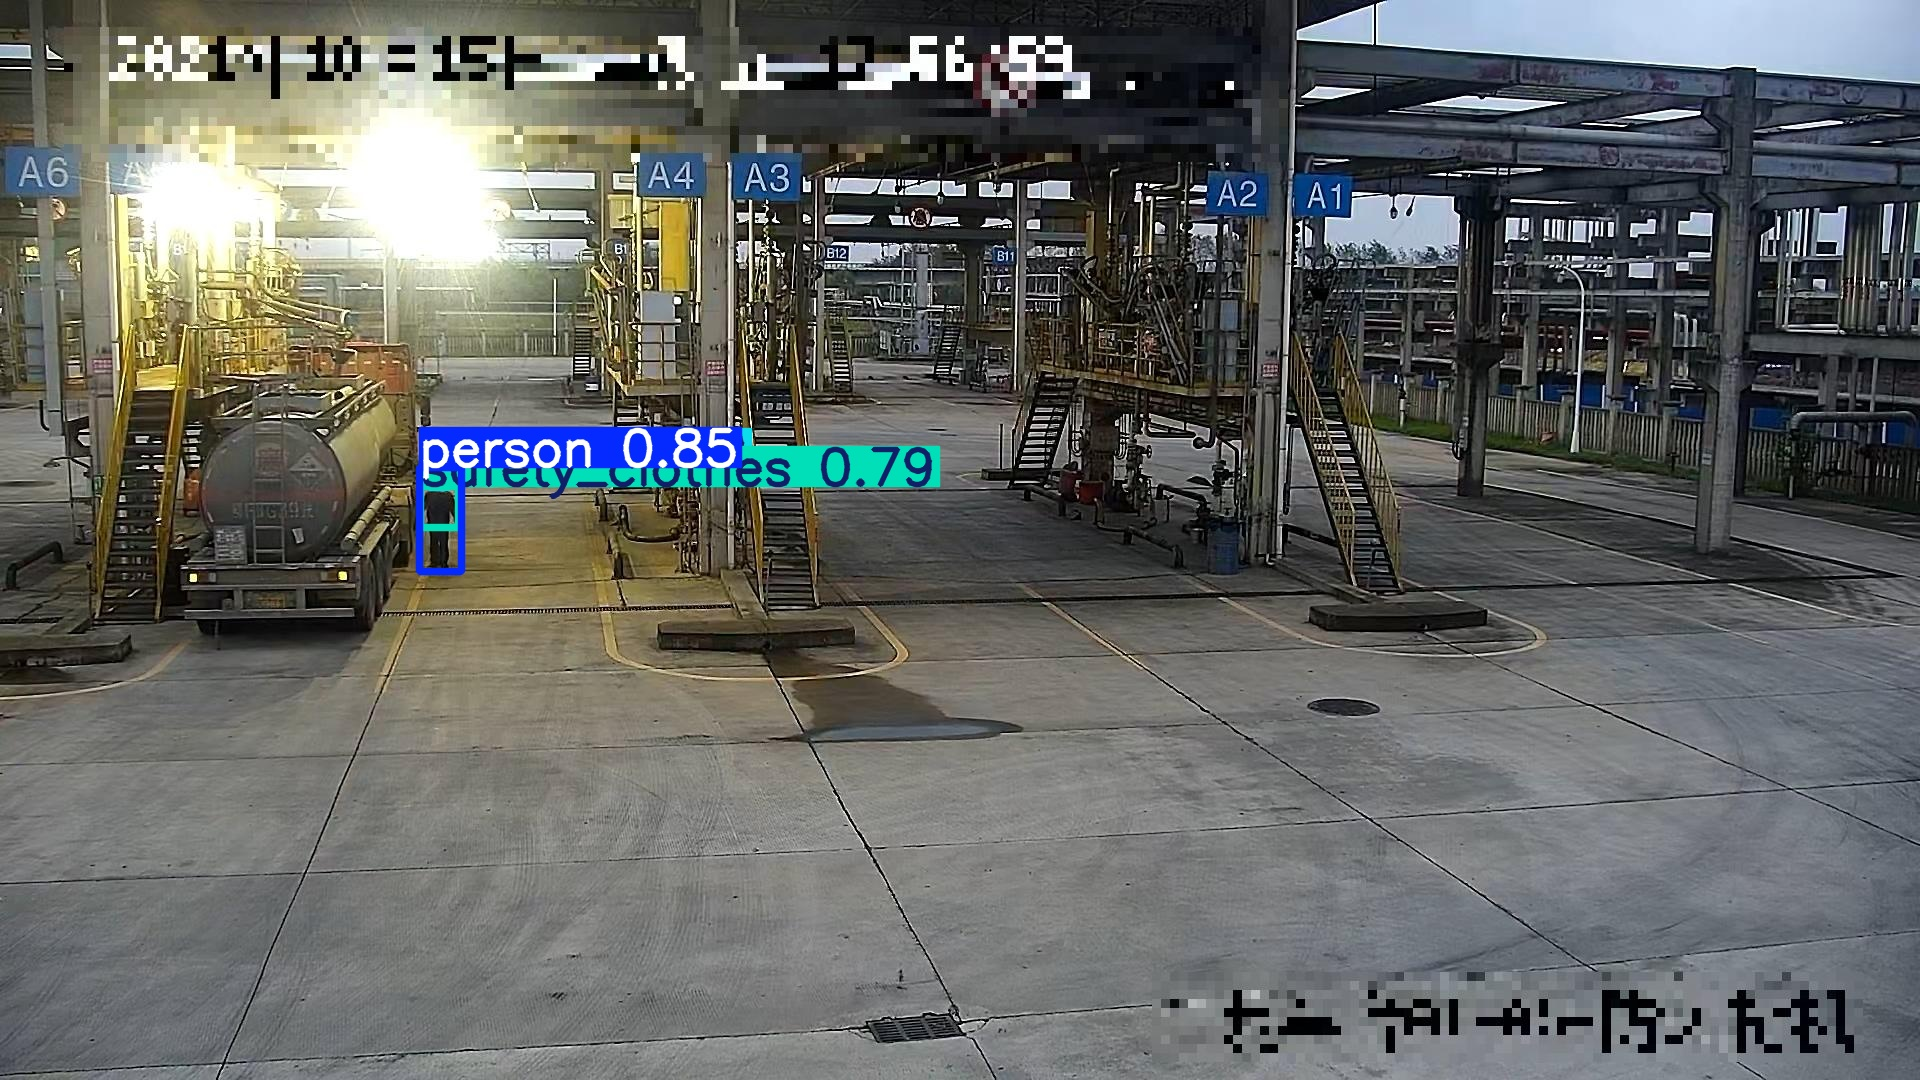

In [18]:
results = model.predict(source="dataset/images/test/192.168.2.222_70.jpg", conf=0.25, save=True)
Image(filename='runs/detect/predict2/192.168.2.222_70.jpg')

# testing model with frezzing only backbone layers

In [23]:
results = model.train(
    data='data.yaml',
    epochs=100,
    imgsz=640,
    batch=16,
    workers=4,
    lr0=0.01,
    device='cuda',
    name='Test',
    freeze=[0]
)

New https://pypi.org/project/ultralytics/8.3.159 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.155 🚀 Python-3.10.12 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 2080 SUPER, 7784MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=[0], half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=runs/detect/Sec/weights/best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=Test, nbs=64, nms=False, opset=N

train: Scanning /home/a85d/solr-home/Vision/dataset/labels/train.cache... 8908 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8908/8908 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2694.4±2308.9 MB/s, size: 155.7 KB)


val: Scanning /home/a85d/solr-home/Vision/dataset/labels/val.cache... 2228 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2228/2228 [00:00<?, ?it/s]


Plotting labels to runs/detect/Test/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/Test
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.74G       1.25      1.244      1.059         81        640: 100%|██████████| 557/557 [01:25<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.57it/s]


                   all       2228       9273       0.79      0.618      0.674      0.412

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.77G      1.076     0.7141     0.9842        120        640: 100%|██████████| 557/557 [01:21<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:13<00:00,  5.22it/s]

                   all       2228       9273      0.733      0.632      0.675      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.88G      1.068     0.6305     0.9794         77        640: 100%|██████████| 557/557 [01:20<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.52it/s]


                   all       2228       9273       0.77      0.665      0.703      0.442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.87G       1.09      0.615      0.984         94        640: 100%|██████████| 557/557 [01:20<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:12<00:00,  5.71it/s]

                   all       2228       9273      0.781      0.657      0.711      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.84G      1.065     0.5838     0.9795         62        640: 100%|██████████| 557/557 [01:19<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.68it/s]


                   all       2228       9273      0.784      0.664      0.723      0.456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.82G      1.053     0.5699     0.9732         99        640: 100%|██████████| 557/557 [01:20<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:07<00:00,  8.76it/s]


                   all       2228       9273      0.769      0.681      0.723      0.457

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.87G      1.043     0.5562     0.9683         66        640: 100%|██████████| 557/557 [01:21<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.74it/s]


                   all       2228       9273      0.783      0.688      0.722      0.459

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.86G      1.029     0.5498     0.9644         87        640: 100%|██████████| 557/557 [01:20<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.72it/s]


                   all       2228       9273       0.76      0.692      0.723      0.464

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.85G      1.028     0.5427     0.9671        110        640: 100%|██████████| 557/557 [01:20<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.66it/s]


                   all       2228       9273      0.782      0.687      0.736      0.472

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.85G       1.02     0.5408     0.9629         53        640: 100%|██████████| 557/557 [01:20<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.75it/s]


                   all       2228       9273      0.783      0.701      0.742      0.481

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.84G      1.008     0.5283      0.961        113        640: 100%|██████████| 557/557 [01:20<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  8.42it/s]


                   all       2228       9273       0.75      0.702      0.739      0.477

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.83G      1.002     0.5218     0.9566        117        640: 100%|██████████| 557/557 [01:20<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:14<00:00,  4.84it/s]

                   all       2228       9273      0.757      0.701      0.737      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.87G      1.005     0.5265     0.9602         58        640: 100%|██████████| 557/557 [01:21<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:14<00:00,  4.80it/s]

                   all       2228       9273      0.816      0.684      0.737      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.81G     0.9929     0.5144     0.9537        111        640: 100%|██████████| 557/557 [01:23<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:17<00:00,  4.06it/s]

                   all       2228       9273      0.807      0.696      0.736       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.83G     0.9882     0.5127     0.9511         70        640: 100%|██████████| 557/557 [01:21<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:13<00:00,  5.01it/s]

                   all       2228       9273      0.755      0.699      0.738      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.84G     0.9882     0.5097     0.9524         70        640: 100%|██████████| 557/557 [01:35<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.75it/s]

                   all       2228       9273      0.795      0.673      0.723      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.87G      0.979     0.5067      0.949        138        640: 100%|██████████| 557/557 [01:36<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:13<00:00,  5.10it/s]

                   all       2228       9273      0.757      0.701      0.732      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.85G     0.9826     0.5026     0.9517         75        640: 100%|██████████| 557/557 [01:30<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:11<00:00,  5.89it/s]

                   all       2228       9273      0.782      0.694      0.739      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.84G     0.9734     0.4999     0.9486         94        640: 100%|██████████| 557/557 [01:36<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.72it/s]

                   all       2228       9273      0.769      0.703      0.737      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.87G     0.9636     0.4962     0.9458         85        640: 100%|██████████| 557/557 [01:34<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:11<00:00,  6.17it/s]

                   all       2228       9273      0.798        0.7      0.745      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.87G     0.9702     0.4949     0.9492         98        640: 100%|██████████| 557/557 [01:35<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.75it/s]

                   all       2228       9273      0.795      0.702      0.748      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.85G     0.9669      0.491     0.9464         62        640: 100%|██████████| 557/557 [01:36<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.62it/s]

                   all       2228       9273       0.79        0.7       0.74      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.86G     0.9598     0.4897     0.9448        128        640: 100%|██████████| 557/557 [01:30<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.79it/s]

                   all       2228       9273      0.778      0.707      0.738      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.84G     0.9584     0.4898     0.9412         96        640: 100%|██████████| 557/557 [01:36<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.62it/s]

                   all       2228       9273       0.77       0.72      0.748       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.84G      0.958     0.4852     0.9443        161        640: 100%|██████████| 557/557 [01:35<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:09<00:00,  7.76it/s]

                   all       2228       9273      0.805      0.706      0.751      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.82G     0.9545     0.4866     0.9405         75        640: 100%|██████████| 557/557 [01:32<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.84it/s]

                   all       2228       9273      0.773       0.71      0.748      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.87G      0.949      0.482     0.9403        110        640: 100%|██████████| 557/557 [01:36<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.85it/s]

                   all       2228       9273      0.788      0.711      0.743      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.83G      0.943     0.4799     0.9382         81        640: 100%|██████████| 557/557 [01:30<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.71it/s]

                   all       2228       9273      0.776      0.717      0.756      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.84G     0.9461     0.4804     0.9371         79        640: 100%|██████████| 557/557 [01:36<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.80it/s]

                   all       2228       9273      0.762      0.717      0.746      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.84G     0.9402     0.4775     0.9361        106        640: 100%|██████████| 557/557 [01:36<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:09<00:00,  7.07it/s]

                   all       2228       9273      0.807      0.711      0.745      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.84G     0.9397     0.4775     0.9354         77        640: 100%|██████████| 557/557 [01:30<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.72it/s]

                   all       2228       9273      0.781      0.707      0.748      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.85G       0.94     0.4748     0.9355        109        640: 100%|██████████| 557/557 [01:36<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.87it/s]

                   all       2228       9273      0.803      0.711      0.754      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.87G     0.9294     0.4681     0.9323         58        640: 100%|██████████| 557/557 [01:32<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:09<00:00,  7.66it/s]

                   all       2228       9273      0.816      0.702      0.755        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.85G     0.9279     0.4697       0.93         85        640: 100%|██████████| 557/557 [01:35<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.79it/s]

                   all       2228       9273      0.798      0.718      0.758      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.87G     0.9227     0.4641     0.9313         87        640: 100%|██████████| 557/557 [01:35<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.78it/s]

                   all       2228       9273      0.824      0.698      0.753      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.86G     0.9155     0.4618     0.9282        119        640: 100%|██████████| 557/557 [01:30<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.66it/s]

                   all       2228       9273      0.787      0.717      0.749      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.84G     0.9186     0.4616     0.9274        103        640: 100%|██████████| 557/557 [01:36<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.70it/s]

                   all       2228       9273      0.811      0.719      0.757      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.85G     0.9191      0.461      0.929         78        640: 100%|██████████| 557/557 [01:34<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  7.98it/s]

                   all       2228       9273      0.806      0.705      0.751      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.86G     0.9114     0.4581     0.9279        104        640: 100%|██████████| 557/557 [01:33<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.80it/s]

                   all       2228       9273      0.802      0.728      0.758      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.86G      0.904     0.4553      0.926        137        640:  69%|██████▊   | 382/557 [01:05<00:30,  5.72it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e44ba35ca60>
Traceback (most recent call last):
  File "/home/a85d/.local/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1663, in __del__
    self._shutdown_workers()
  File "/home/a85d/.local/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1646, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e44ba35ca60>
Traceback (most recent call last):
  File "/home/a85d/.local/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1663, in __del__
    self._shutdown_workers()
  

                   all       2228       9273       0.81      0.719      0.759      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.86G     0.9023     0.4539     0.9198        118        640:  40%|████      | 223/557 [00:38<00:53,  6.20it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e44ba35ca60>
Traceback (most recent call last):
  File "/home/a85d/.local/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1663, in __del__
    self._shutdown_workers()
  File "/home/a85d/.local/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1646, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e44ba35ca60>
     41/100      3.86G     0.9025      0.454     0.9198        116        640:  40%|████      | 223/557 [00:38<00:53,  6.20it/s]Traceback (most recent call last):
     41/100  

                   all       2228       9273      0.815      0.717      0.759      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.82G     0.9048     0.4525     0.9247        124        640: 100%|██████████| 557/557 [01:35<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.74it/s]

                   all       2228       9273      0.803       0.72      0.764      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.83G     0.9005      0.452     0.9222         94        640: 100%|██████████| 557/557 [01:36<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:09<00:00,  7.34it/s]

                   all       2228       9273      0.801      0.719      0.763       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.84G     0.9003     0.4522     0.9234         97        640: 100%|██████████| 557/557 [01:31<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.81it/s]

                   all       2228       9273      0.811      0.729      0.771      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.84G     0.9039     0.4528     0.9213         74        640: 100%|██████████| 557/557 [01:36<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.68it/s]

                   all       2228       9273      0.794       0.72      0.758      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.82G     0.8976     0.4503     0.9202         89        640: 100%|██████████| 557/557 [01:31<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:09<00:00,  7.30it/s]

                   all       2228       9273      0.793      0.723      0.759      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.86G     0.8931     0.4473     0.9194        108        640: 100%|██████████| 557/557 [01:35<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.72it/s]

                   all       2228       9273      0.822      0.708      0.758      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.85G     0.8883     0.4454     0.9164         69        640: 100%|██████████| 557/557 [01:35<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.77it/s]

                   all       2228       9273      0.812      0.729      0.767      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.85G      0.888     0.4431     0.9168         68        640: 100%|██████████| 557/557 [01:30<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.74it/s]

                   all       2228       9273      0.818      0.705      0.759      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.85G      0.884      0.444     0.9157         84        640: 100%|██████████| 557/557 [01:35<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.68it/s]

                   all       2228       9273       0.81      0.714       0.76      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.86G     0.8785     0.4347     0.9142        105        640: 100%|██████████| 557/557 [01:33<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:09<00:00,  7.74it/s]

                   all       2228       9273      0.803      0.713       0.76       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.83G     0.8852     0.4416      0.915         58        640: 100%|██████████| 557/557 [01:34<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.89it/s]

                   all       2228       9273      0.813      0.717      0.763      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.87G     0.8762      0.437     0.9106         94        640: 100%|██████████| 557/557 [01:35<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.88it/s]

                   all       2228       9273      0.803      0.725      0.763      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.85G     0.8827     0.4395     0.9135         67        640: 100%|██████████| 557/557 [01:30<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.86it/s]

                   all       2228       9273      0.798      0.728      0.763      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.85G     0.8743     0.4362     0.9119        119        640: 100%|██████████| 557/557 [01:35<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.82it/s]

                   all       2228       9273        0.8      0.738      0.768      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.86G     0.8676      0.432     0.9119         87        640: 100%|██████████| 557/557 [01:36<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:09<00:00,  7.75it/s]

                   all       2228       9273      0.793      0.724      0.761      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.87G     0.8673     0.4321     0.9105         85        640: 100%|██████████| 557/557 [01:31<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.82it/s]

                   all       2228       9273      0.804      0.715      0.758      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.82G     0.8706      0.432     0.9099         89        640: 100%|██████████| 557/557 [01:36<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.77it/s]

                   all       2228       9273      0.796      0.728      0.761      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.84G     0.8669     0.4311     0.9083         60        640: 100%|██████████| 557/557 [01:30<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:09<00:00,  7.56it/s]

                   all       2228       9273      0.818      0.725      0.768      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.87G     0.8623      0.428     0.9075         70        640: 100%|██████████| 557/557 [01:36<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.78it/s]

                   all       2228       9273      0.809      0.723      0.765      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.87G     0.8611     0.4286     0.9073         97        640: 100%|██████████| 557/557 [01:36<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.76it/s]

                   all       2228       9273      0.797      0.735      0.769      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.83G     0.8509     0.4235     0.9032        103        640: 100%|██████████| 557/557 [01:30<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.75it/s]

                   all       2228       9273      0.816      0.726      0.769      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.84G     0.8495     0.4215     0.9061        106        640: 100%|██████████| 557/557 [01:35<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.68it/s]

                   all       2228       9273      0.813      0.721      0.767      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.87G     0.8463     0.4176     0.9035         65        640: 100%|██████████| 557/557 [01:33<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  7.94it/s]

                   all       2228       9273      0.813      0.725       0.77      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.86G     0.8412     0.4165     0.9018         81        640: 100%|██████████| 557/557 [01:34<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.69it/s]

                   all       2228       9273      0.811      0.725       0.77      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.81G     0.8419      0.418     0.8999         67        640: 100%|██████████| 557/557 [01:36<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.77it/s]

                   all       2228       9273      0.816      0.729      0.768      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.87G     0.8401     0.4145     0.9039        116        640: 100%|██████████| 557/557 [01:30<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.75it/s]

                   all       2228       9273      0.808      0.729       0.77       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.83G     0.8322     0.4114     0.8968        100        640: 100%|██████████| 557/557 [01:35<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.80it/s]

                   all       2228       9273      0.797      0.731      0.771      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.83G     0.8261     0.4086     0.8964         76        640: 100%|██████████| 557/557 [01:35<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  7.79it/s]

                   all       2228       9273       0.79      0.735      0.771      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.82G     0.8301     0.4101     0.8984         78        640: 100%|██████████| 557/557 [01:32<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.75it/s]

                   all       2228       9273      0.793      0.736      0.767      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      3.84G     0.8301     0.4094     0.8948         84        640: 100%|██████████| 557/557 [01:35<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.87it/s]

                   all       2228       9273      0.794      0.739      0.769      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.87G     0.8274     0.4086     0.8974         48        640: 100%|██████████| 557/557 [01:30<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  7.00it/s]

                   all       2228       9273       0.79      0.741      0.768      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.87G     0.8267     0.4082     0.8931         91        640: 100%|██████████| 557/557 [01:35<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.78it/s]

                   all       2228       9273      0.786      0.738      0.769      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.85G     0.8203     0.4044     0.8936         86        640: 100%|██████████| 557/557 [01:36<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.86it/s]

                   all       2228       9273      0.788      0.743      0.771      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      3.87G     0.8128     0.4028     0.8919         90        640: 100%|██████████| 557/557 [01:30<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.75it/s]

                   all       2228       9273      0.796      0.732      0.769       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.83G     0.8122     0.4008     0.8914        107        640: 100%|██████████| 557/557 [01:35<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.77it/s]

                   all       2228       9273      0.793      0.736       0.77       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      3.83G     0.8081     0.3992     0.8912         76        640: 100%|██████████| 557/557 [01:32<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:08<00:00,  7.91it/s]

                   all       2228       9273      0.796      0.732      0.771      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.83G     0.8105     0.3998     0.8933        100        640: 100%|██████████| 557/557 [01:34<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.73it/s]

                   all       2228       9273      0.803      0.727       0.77      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      3.85G      0.799     0.3939     0.8871        110        640: 100%|██████████| 557/557 [01:36<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.69it/s]

                   all       2228       9273      0.807      0.727      0.771      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.87G     0.7971     0.3921     0.8885         99        640: 100%|██████████| 557/557 [01:30<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.56it/s]

                   all       2228       9273      0.795      0.737       0.77      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.86G     0.8017     0.3929      0.888         76        640: 100%|██████████| 557/557 [01:36<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.72it/s]

                   all       2228       9273      0.798       0.74      0.769      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      3.85G     0.7999     0.3939     0.8856         96        640: 100%|██████████| 557/557 [01:34<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:09<00:00,  7.49it/s]

                   all       2228       9273      0.787      0.736      0.768       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      3.83G     0.7942     0.3922     0.8861         84        640: 100%|██████████| 557/557 [01:32<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.74it/s]

                   all       2228       9273      0.802      0.731      0.768       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      3.83G     0.7901     0.3884     0.8854         86        640: 100%|██████████| 557/557 [01:35<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.77it/s]

                   all       2228       9273      0.793      0.741      0.768      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      3.87G     0.7901     0.3886     0.8868         99        640: 100%|██████████| 557/557 [01:30<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.84it/s]

                   all       2228       9273      0.796      0.736      0.769      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      3.85G     0.7869     0.3872     0.8844         86        640: 100%|██████████| 557/557 [01:36<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.55it/s]

                   all       2228       9273      0.796       0.74      0.769       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      3.84G     0.7796     0.3839      0.883         69        640: 100%|██████████| 557/557 [01:30<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:11<00:00,  6.35it/s]

                   all       2228       9273      0.802      0.732      0.769       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      3.85G     0.7785     0.3829     0.8814         93        640: 100%|██████████| 557/557 [01:31<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:09<00:00,  7.59it/s]

                   all       2228       9273      0.815      0.723      0.769       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      3.87G     0.7764     0.3774     0.8811         94        640: 100%|██████████| 557/557 [01:34<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.80it/s]

                   all       2228       9273      0.812      0.726       0.77      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      3.81G     0.7691     0.3772     0.8785         57        640: 100%|██████████| 557/557 [01:36<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.78it/s]

                   all       2228       9273      0.813      0.727      0.769      0.521


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      3.84G      0.752     0.3603     0.8741         61        640: 100%|██████████| 557/557 [01:29<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.87it/s]

                   all       2228       9273      0.795      0.735      0.768      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      3.82G     0.7389     0.3549     0.8728         40        640: 100%|██████████| 557/557 [01:34<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.64it/s]

                   all       2228       9273      0.796      0.735      0.767      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      3.82G      0.736       0.35     0.8711         29        640: 100%|██████████| 557/557 [01:34<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:09<00:00,  7.70it/s]

                   all       2228       9273      0.799      0.735      0.768      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100       3.8G     0.7316     0.3494     0.8705         51        640: 100%|██████████| 557/557 [01:31<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.76it/s]

                   all       2228       9273      0.796      0.734      0.767      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      3.82G     0.7288     0.3483     0.8689         48        640: 100%|██████████| 557/557 [01:35<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.68it/s]

                   all       2228       9273      0.798      0.732      0.767      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      3.84G     0.7289     0.3483     0.8688         50        640: 100%|██████████| 557/557 [01:29<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.98it/s]

                   all       2228       9273      0.794      0.733      0.767      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      3.82G      0.718     0.3417     0.8683         34        640: 100%|██████████| 557/557 [01:35<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.81it/s]

                   all       2228       9273      0.795      0.733      0.767      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100       3.8G     0.7158     0.3434     0.8664         42        640: 100%|██████████| 557/557 [01:35<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.73it/s]

                   all       2228       9273      0.808      0.722      0.767      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      3.82G     0.7143     0.3384     0.8636         39        640: 100%|██████████| 557/557 [01:29<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.65it/s]

                   all       2228       9273      0.791      0.736      0.767      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      3.84G     0.7112     0.3401     0.8619         49        640: 100%|██████████| 557/557 [01:35<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.88it/s]

                   all       2228       9273      0.789      0.737      0.766      0.518



100 epochs completed in 2.859 hours.
Optimizer stripped from runs/detect/Test/weights/last.pt, 19.2MB
Optimizer stripped from runs/detect/Test/weights/best.pt, 19.2MB

Validating runs/detect/Test/weights/best.pt...
Ultralytics 8.3.155 🚀 Python-3.10.12 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 2080 SUPER, 7784MiB)
YOLO11s summary (fused): 100 layers, 9,415,509 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:10<00:00,  6.44it/s]


                   all       2228       9273      0.807      0.727      0.772      0.523
                person       2228       3122      0.945      0.958      0.976      0.744
                helmet       1968       2629       0.92      0.855      0.926      0.653
          self_clothes        123        136      0.783      0.797      0.861      0.597
        safety_clothes       2034       2728      0.896       0.95       0.96      0.683
                  head        158        210      0.875      0.736      0.815      0.489
             blur_head        189        213      0.607      0.338      0.362      0.194
          blur_clothes        204        235      0.623      0.455      0.501      0.303
Speed: 0.1ms preprocess, 1.6ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/Test


In [24]:
model_path = "runs/detect/Test/weights/best.pt"
data_yaml = "data.yaml"

# Load the model
model = YOLO(model_path)

# Run evaluation on test set
metrics = model.val(
    data=data_yaml,
    split="test",          # Uses test set (not train or val)
    save=True,             # Saves visual output
    save_conf=True,        # Saves confidences
    save_txt=True,         # Saves predicted labels in YOLO format
    save_json=True,        # Saves COCO-style results.json
    save_crop=True,        # Saves detected object crops
    plots=True             # Saves all metric curves
)

# Print key evaluation metrics
print("Evaluation Metrics")
print(f"mAP@0.5: {metrics.box.map50:.4f}")
print(f"mAP@0.5:0.95: {metrics.box.map:.4f}")

Ultralytics 8.3.155 🚀 Python-3.10.12 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 2080 SUPER, 7784MiB)
YOLO11s summary (fused): 100 layers, 9,415,509 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.6±0.3 ms, read: 149.8±21.7 MB/s, size: 136.6 KB)


val: Scanning /home/a85d/solr-home/Vision/dataset/labels/test.cache... 1236 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1236/1236 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [00:14<00:00,  5.44it/s]


                   all       1236       5081      0.792      0.721      0.767      0.529
                person       1234       1716      0.935      0.955      0.972      0.748
                helmet       1079       1436      0.925      0.889       0.94      0.668
          self_clothes         76         80      0.775      0.812      0.844      0.615
        safety_clothes       1096       1474      0.882       0.95      0.957      0.683
                  head         88        123      0.874       0.65      0.775       0.45
             blur_head         96        109      0.541      0.358      0.369      0.215
          blur_clothes        127        143      0.612       0.43      0.513      0.327
Speed: 0.2ms preprocess, 3.3ms inference, 0.0ms loss, 0.6ms postprocess per image
Saving runs/detect/val7/predictions.json...
Results saved to runs/detect/val7
Evaluation Metrics
mAP@0.5: 0.7673
mAP@0.5:0.95: 0.5295
